- Group Name: Project Group 51
- Member #1: s3716113 LiangyuNie
- Member #2: s3748848 ChetaoXu
- Member #3: s3786467 SihengLuo
- Member #4: s3650636 Junhe Hu
- Member #5: s3737937 Huiyu Wang

# Terrorism in the world

##  Introduction

The objective of this project is to analysis the data of the terrorism during 1970-2017, the dataset was sourced from STR-UMD at https://www.start.umd.edu/gtd/
This report is organized as follows:
- [Overview](##Overview) section analysises the world terrorism by Year,Region,Target and type of attack. 
- [Middle East & North Africa](##Middle_East&North_Africa) section anlysises Middle East&North_Africa terrorism by Year,Region,Target and type of attack. deeply analysis Iraq and Turkey
- [Europe](##Europe) section anlysises Europe terrorism by date, country, fatalities, type and method of attack  
- [USA](##USA) section anlysises USA terrorism by date, country, fatalities, type and method of attack also analysis before 9/11 and after 9/11

### Data Source

This gtd dataset procides 109 datasets, only `iyear`, `imonth`, `iday`, `country_txt`,`region_txt`,`latitude`, `longitude`,`attacketype1_txt`,`targtype1_txt`,`weaptype1_txt`,`nkill` is the most important in this project, this dataset has 181692 rows and 109 features, however in our case, we only use 14 features

### Project Objective

Our aim is to do some Data cleaning and basic Exporatory Data Analysis about terrorism in the Earth, MiddleEast&NorthAfrica, USA and Europe after 2000. During prject you will see:
- A global analysis of terrorism during 1970-2017  
-- terrorist by region and country  
-- terrorist by date  
-- successful/ unsuccessfull terrorist strike  
-- Type of attacks  
-- Type of target   
- MiddleEast & NorthAfrica analysis during 1970-2017  
-- number of attacks and killed 
-- attacking method  
-- targets  
-- Terrorist group  
-- Activities by date  
-- Iraq analysis  
-- Turkey analysis  
- Europe analysis during 2000 -2017  
-- incidents by region  
-- incidents by date   
-- number of fatalities by season  
-- incidents by duration   
--  incidents by general weapon type  

###  Descriptive Features

`eventid` - A 12-digit Event ID system. First 8 numbers – date recorded “yyyymmdd”. Last 4 numbers – sequential case number for the given day (0001, 0002 etc)  
`iyear` - a year in which the incident occurred (in this project: from 2001 to 2017)  
`imonth` - a month in which the incident occurred  
`iday` - a day in which the incident occured  
`approxdate` - approximate date of terrorist incident (in cases, if exact date of terrorist incident is not known)  
`extended` - 1 = "Yes" The duration of an incident extended more than 24 hours. 0 = "No" The duration of an incident extended less than 24 hours    
`country_txt` - country or location where the incident occurred  
`region_txt` - region where the incident occured (in this project - Eastern and Western Europe)  
`latitude` - the latitude of the city in which the event occurred  
`longitude` - the longitude of the city in which the event occurred  
`attacktype1_txt` - general method of attack  
`targtype1_txt` - general type of target/victim  
`weaptype1_txt` - general type of weapon used in the incident  
`nkill` - the number of total confirmed fatalities for the incident  

In [2]:
%%HTML
<div class='tableauPlaceholder' id='viz1512233423027' style='position: relative'>
<noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;RD&#47;RDGKRRHB7&#47;
1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' 
value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> 
<param name='path' value='shared&#47;RDGKRRHB7' /> <param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;RD&#47;RDGKRRHB7&#47;1.png' /> 
<param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' />
</object></div>                
<script type='text/javascript'>                    
var divElement = document.getElementById('viz1512233423027');                    
var vizElement = divElement.getElementsByTagName('object')[0];                    
vizElement.style.width='1020px';vizElement.style.minHeight='687px';vizElement.style.maxHeight='1587px';
vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    
var scriptElement = document.createElement('script');                    
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
vizElement.parentNode.insertBefore(scriptElement, vizElement);                
</script>


## Overview

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
import warnings
import folium
warnings.filterwarnings('ignore')
from mpl_toolkits.basemap import Basemap
from matplotlib import animation,rc
import scipy
import folium
from folium.plugins import HeatMap
%pylab inline

Populating the interactive namespace from numpy and matplotlib


###  data prepare

In [5]:
data_ter = pd.read_csv(r'C:/Users/new/Desktop/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

In [6]:
data_ter = data_ter.dropna(thresh=160000,axis=1)
data_ter.head(5)

eventid  iyear  imonth  iday  extended  country         country_txt  \
0  197000000001   1970       7     2         0       58  Dominican Republic   
1  197000000002   1970       0     0         0      130              Mexico   
2  197001000001   1970       1     0         0      160         Philippines   
3  197001000002   1970       1     0         0       78              Greece   
4  197001000003   1970       1     0         0      101               Japan   

   region                   region_txt provstate   ...     \
0       2  Central America & Caribbean       NaN   ...      
1       1                North America   Federal   ...      
2       5               Southeast Asia    Tarlac   ...      
3       8               Western Europe    Attica   ...      
4       4                    East Asia   Fukouka   ...      

         weapsubtype1_txt  nkill  nwound  property  ishostkid  dbsource  \
0                     NaN    1.0     0.0         0        0.0      PGIS   
1                     NaN    0.0     0.0         0        1.0      PGIS   
2                     NaN    1.0     0.0         0        0.0      PGIS   
3  Unknown Explosive Type    NaN     NaN         1        0.0      PGIS   
4                     NaN    NaN     NaN         1        0.0      PGIS   

   INT_LOG  INT_IDEO  INT_MISC  INT_ANY  
0        0         0         0        0  
1        0         1         1        1  
2       -9        -9         1        1  
3       -9        -9         1        1  
4       -9        -9         1        1  

[5 rows x 47 columns]

In [7]:
data_ter.dropna(thresh=160000,axis=1).shape

(181691, 47)

In [10]:
byCountry = data_ter.groupby(['iyear', 'country_txt'])['iyear'].agg('count').unstack()
topTerror = pd.DataFrame(byCountry.idxmax(axis = 1))
topTerror.columns = ['Country Name']
topCount =  pd.DataFrame(topTerror.groupby('Country Name')['Country Name'].agg('count'))
topCount.columns = ['Country']
topCount = topCount.reset_index()
topCount.columns = ['Country', 'Occurrences as Top Terrorism Target']
topCount = topCount.set_index('Country')
topCount.sort_values(by = 'Occurrences as Top Terrorism Target', ascending = False)

Occurrences as Top Terrorism Target
Country                                            
Iraq                                             13
Peru                                              7
Colombia                                          5
El Salvador                                       5
United Kingdom                                    5
India                                             4
Italy                                             2
Pakistan                                          2
United States                                     2
Algeria                                           1
Turkey                                            1

###  full map

In [26]:
attack=data.loc[data_ter.iyear == 1970][['latitude','longitude']]
attack.latitude.fillna(0, inplace = True)
attack.longitude.fillna(0, inplace = True) 

World =folium.Map(location=[0,0],zoom_start=2)
HeatMap(data=attack, radius=16).add_to(World)

print('Terrorism around the world in 1970')
World

Terrorism around the world in 2002


In [27]:
attack=data.loc[data_ter.iyear == 1980][['latitude','longitude']]
attack.latitude.fillna(0, inplace = True)
attack.longitude.fillna(0, inplace = True) 

World =folium.Map(location=[0,0],zoom_start=2)
HeatMap(data=attack, radius=16).add_to(World)

print('Terrorism around the world in 1980')
World

Terrorism around the world in 1980


In [28]:
attack=data.loc[data_ter.iyear == 1990][['latitude','longitude']]
attack.latitude.fillna(0, inplace = True)
attack.longitude.fillna(0, inplace = True) 

World =folium.Map(location=[0,0],zoom_start=2)
HeatMap(data=attack, radius=16).add_to(World)

print('Terrorism around the world in 1990')
World

Terrorism around the world in 1990


In [29]:
attack=data.loc[data_ter.iyear == 2000][['latitude','longitude']]
attack.latitude.fillna(0, inplace = True)
attack.longitude.fillna(0, inplace = True) 

World =folium.Map(location=[0,0],zoom_start=2)
HeatMap(data=attack, radius=16).add_to(World)

print('Terrorism around the world in 2000')
World

Terrorism around the world in 2000


In [30]:
attack=data.loc[data_ter.iyear == 2010][['latitude','longitude']]
attack.latitude.fillna(0, inplace = True)
attack.longitude.fillna(0, inplace = True) 

World =folium.Map(location=[0,0],zoom_start=2)
HeatMap(data=attack, radius=16).add_to(World)

print('Terrorism around the world in 2010')
World

Terrorism around the world in 2010


In [32]:
attack=data.loc[data_ter.iyear == 2017][['latitude','longitude']]
attack.latitude.fillna(0, inplace = True)
attack.longitude.fillna(0, inplace = True) 

World =folium.Map(location=[0,0],zoom_start=2)
HeatMap(data=attack, radius=16).add_to(World)

print('Terrorism around the world in 2017')
World

Terrorism around the world in 2017


###  Annual dynamics by regions

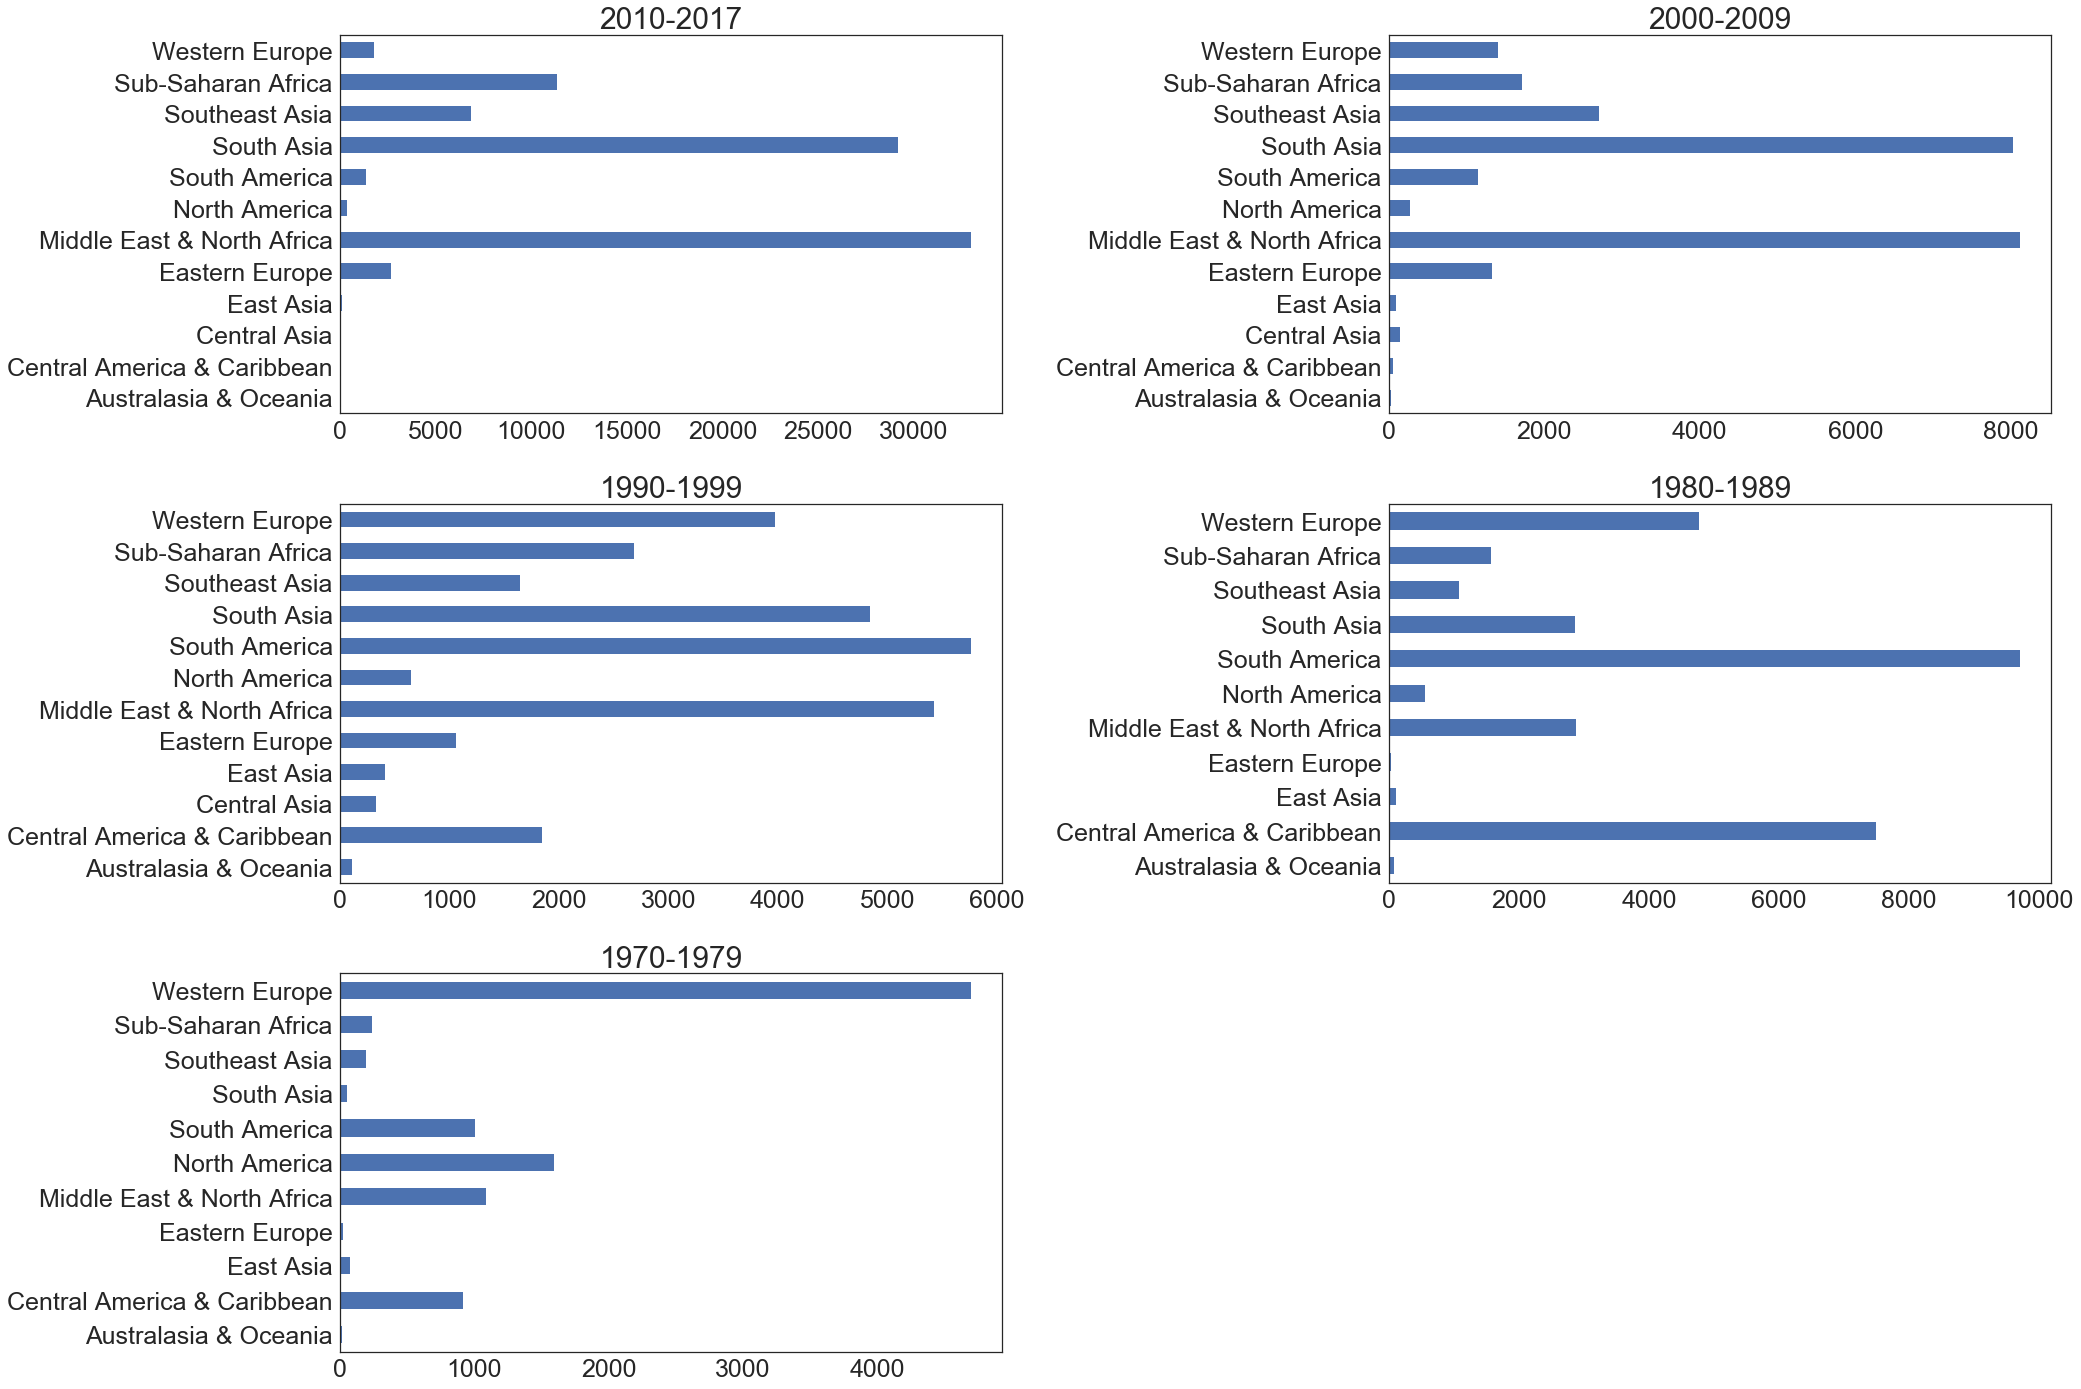

In [33]:
def plot_by_years(kind='region_txt',big=(30,20)):
    sns.set(style="white",font_scale=2.5)
    fig = plt.figure(figsize=big)
    ax1 = fig.add_subplot(3,2,1)
    ax1.set_title('2010-2017')
    ax1.set_ylabel('');
    data_ter[data_ter['iyear']>=2010]['eventid'].groupby(data_ter[kind]).count().plot(kind='barh');
    ax1.set_ylabel('');
    ax2 = fig.add_subplot(3,2,2)
    ax2.set_title('2000-2009')
    data_ter[(data_ter['iyear']>=2000) & (data_ter['iyear']<2010)]['eventid'].groupby(data_ter[kind]).count().plot(kind='barh');
    ax2.set_ylabel('');
    ax3 = fig.add_subplot(3,2,3)
    ax3.set_title('1990-1999')
    data_ter[(data_ter['iyear']>=1990) & (data_ter['iyear']<2000)]['eventid'].groupby(data_ter[kind]).count().plot(kind='barh');
    ax3.set_ylabel('');
    ax4 = fig.add_subplot(3,2,4)
    ax4.set_title('1980-1989')
    data_ter[(data_ter['iyear']>=1980) & (data_ter['iyear']<1990)]['eventid'].groupby(data_ter[kind]).count().plot(kind='barh');
    ax4.set_ylabel('');
    ax4 = fig.add_subplot(3,2,5)
    ax4.set_title('1970-1979')
    data_ter[(data_ter['iyear']>=1970) & (data_ter['iyear']<1980)]['eventid'].groupby(data_ter[kind]).count().plot(kind='barh');
    plt.tight_layout()
    plt.ylabel('');
plot_by_years(kind='region_txt')

###  Annual dynamics by time

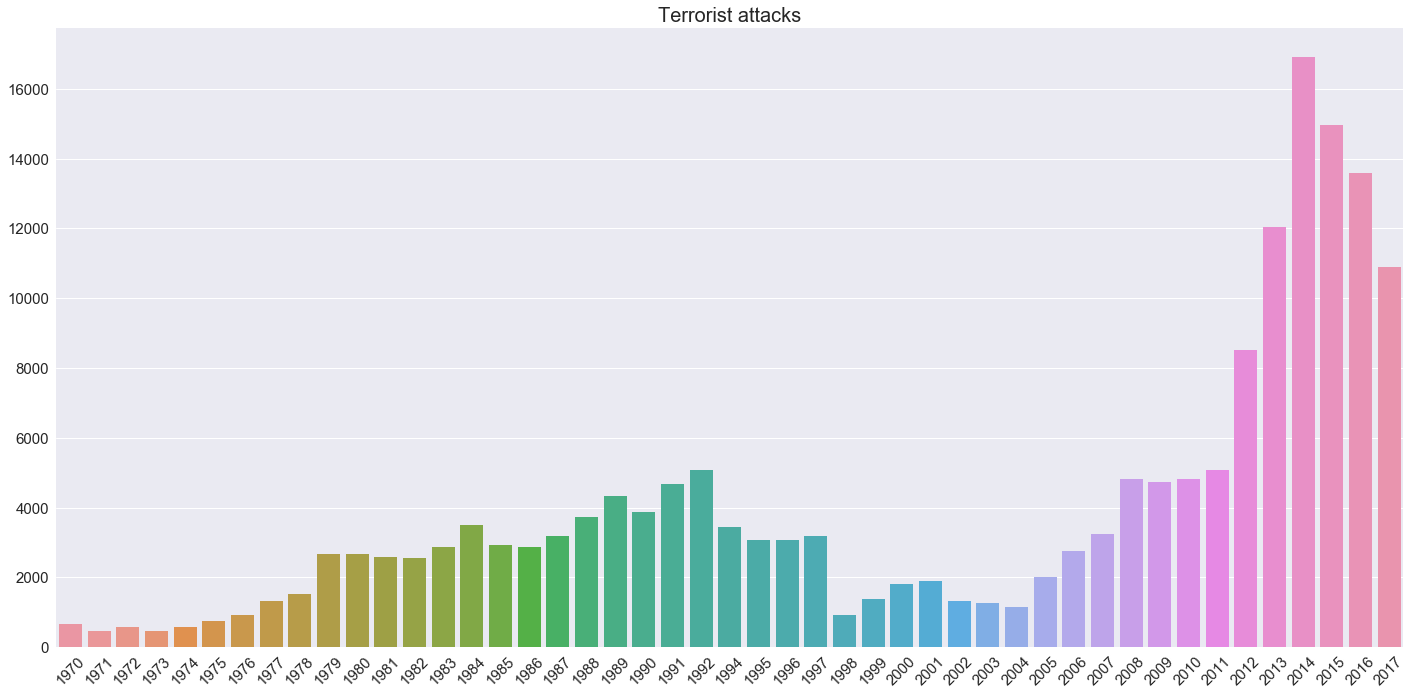

In [34]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(20,10))
sns.countplot(x='iyear',data=data_ter);
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.title('Terrorist attacks', fontsize=20)
plt.tight_layout()

**This shows the exact value of number of terrorist attacks activities per year between 1970 and 2017.the range of year are between 500 and 17000. The highest attacks happen in 2014 while the lowest happen in 1971. What's more, it increases dramatically from 2011 to 2014.**

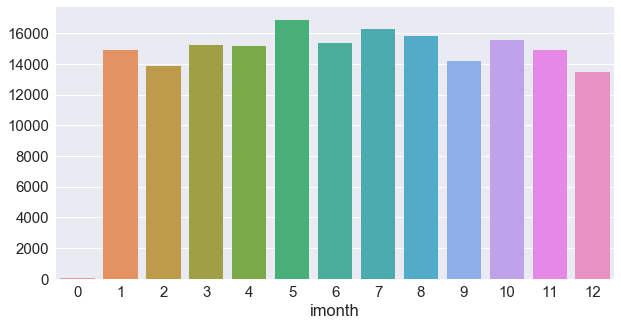

In [35]:
fig = plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)
sns.countplot(data_ter.imonth);
plt.ylabel('');

**This shows the exact value of number of terrorist attacks activities per month between 1970 and 2017.
The range of year are between 13500 and 17000. In May,the number of attacks reach the top,17000,while it remain constant in other month.**

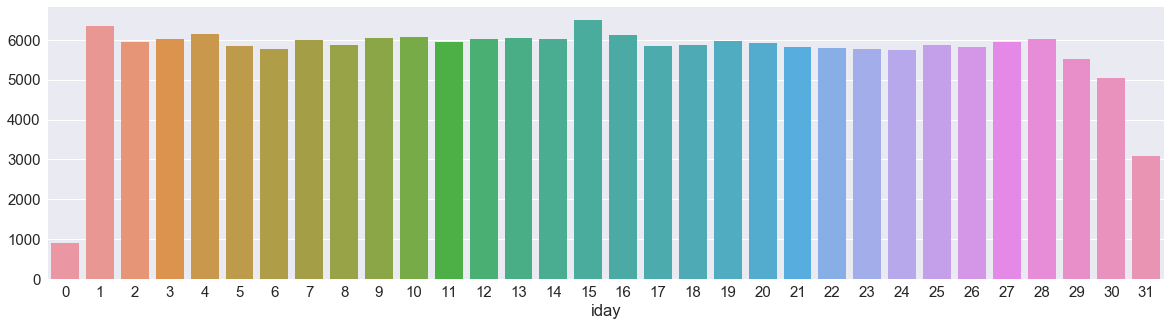

In [36]:
fig = plt.figure(figsize=(20,5))
sns.set(font_scale=1.5)
sns.countplot(data_ter.iday);
plt.ylabel('');

**This shows the exact value of number of terrorist attacks activities per day between 1970 and 2017.
The range of year are between 3000 and 7000. it is obvious that in the middle of the month, the attacks reach the top, while it remain stable in the next days. However, at the end of the month, it decline to the lowest number.**

###  Successful/unsuccessfull terrorist strike

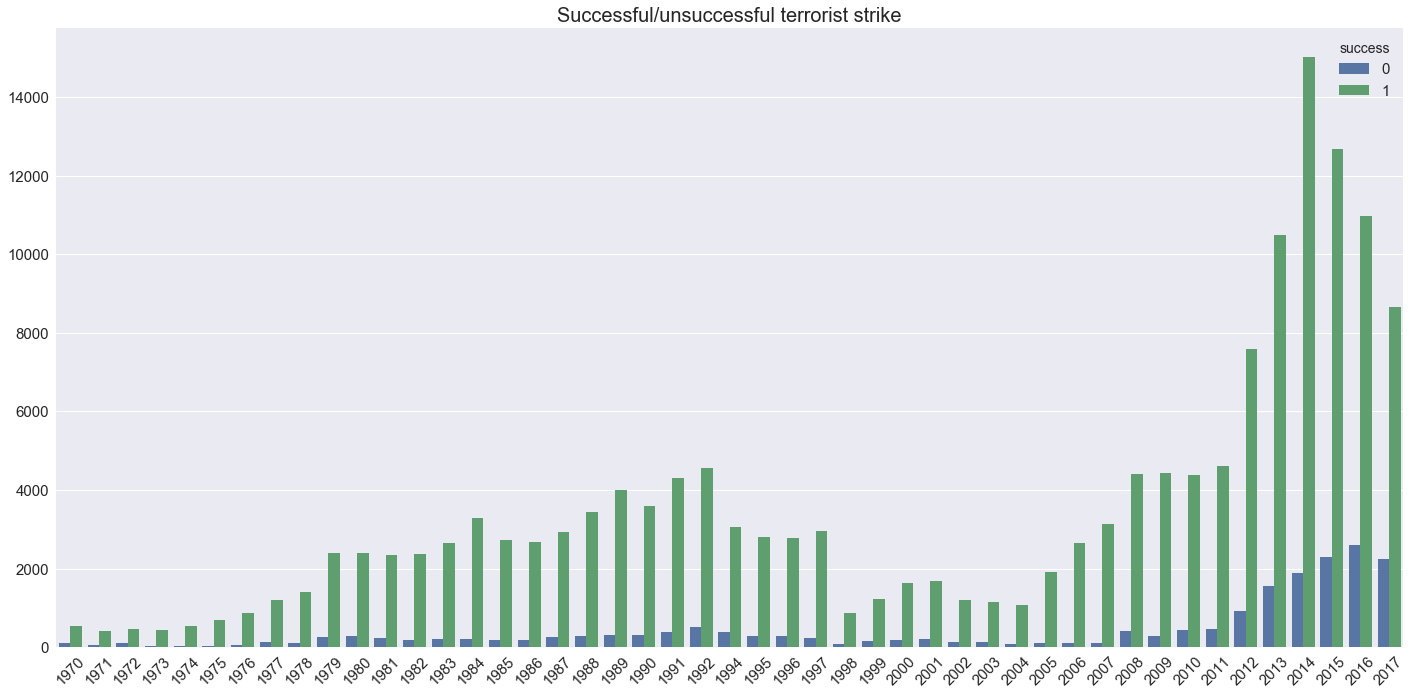

In [37]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(20,10))
sns.countplot(x='iyear',data=data_ter,hue='success', orient='v');
plt.xlabel('')
plt.ylabel('')
plt.title('Successful/unsuccessful terrorist strike', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()

**This shows the exact value of number of successful and unsuccessful terrorist attacks activities per year between 1970 and 2017.
As we can see that the highest successful rate of terrorist strike is in 2014, 90%. Moreover, the successful rate is above 75% bewteen 1970 and 2017.**

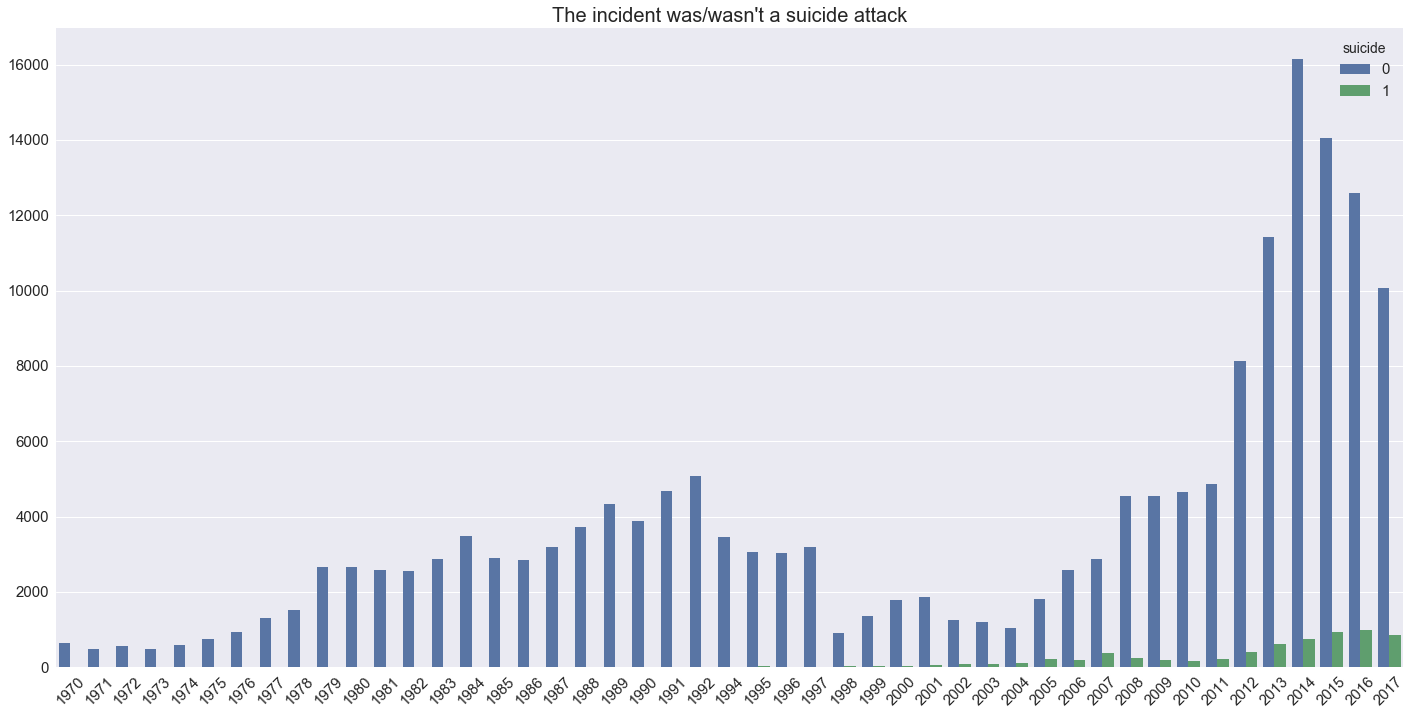

In [38]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(20,10))
sns.countplot(x='iyear',data=data_ter,hue='suicide');
plt.title("The incident was/wasn't a suicide attack", fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.xticks(rotation=45);

###  Type of attacks

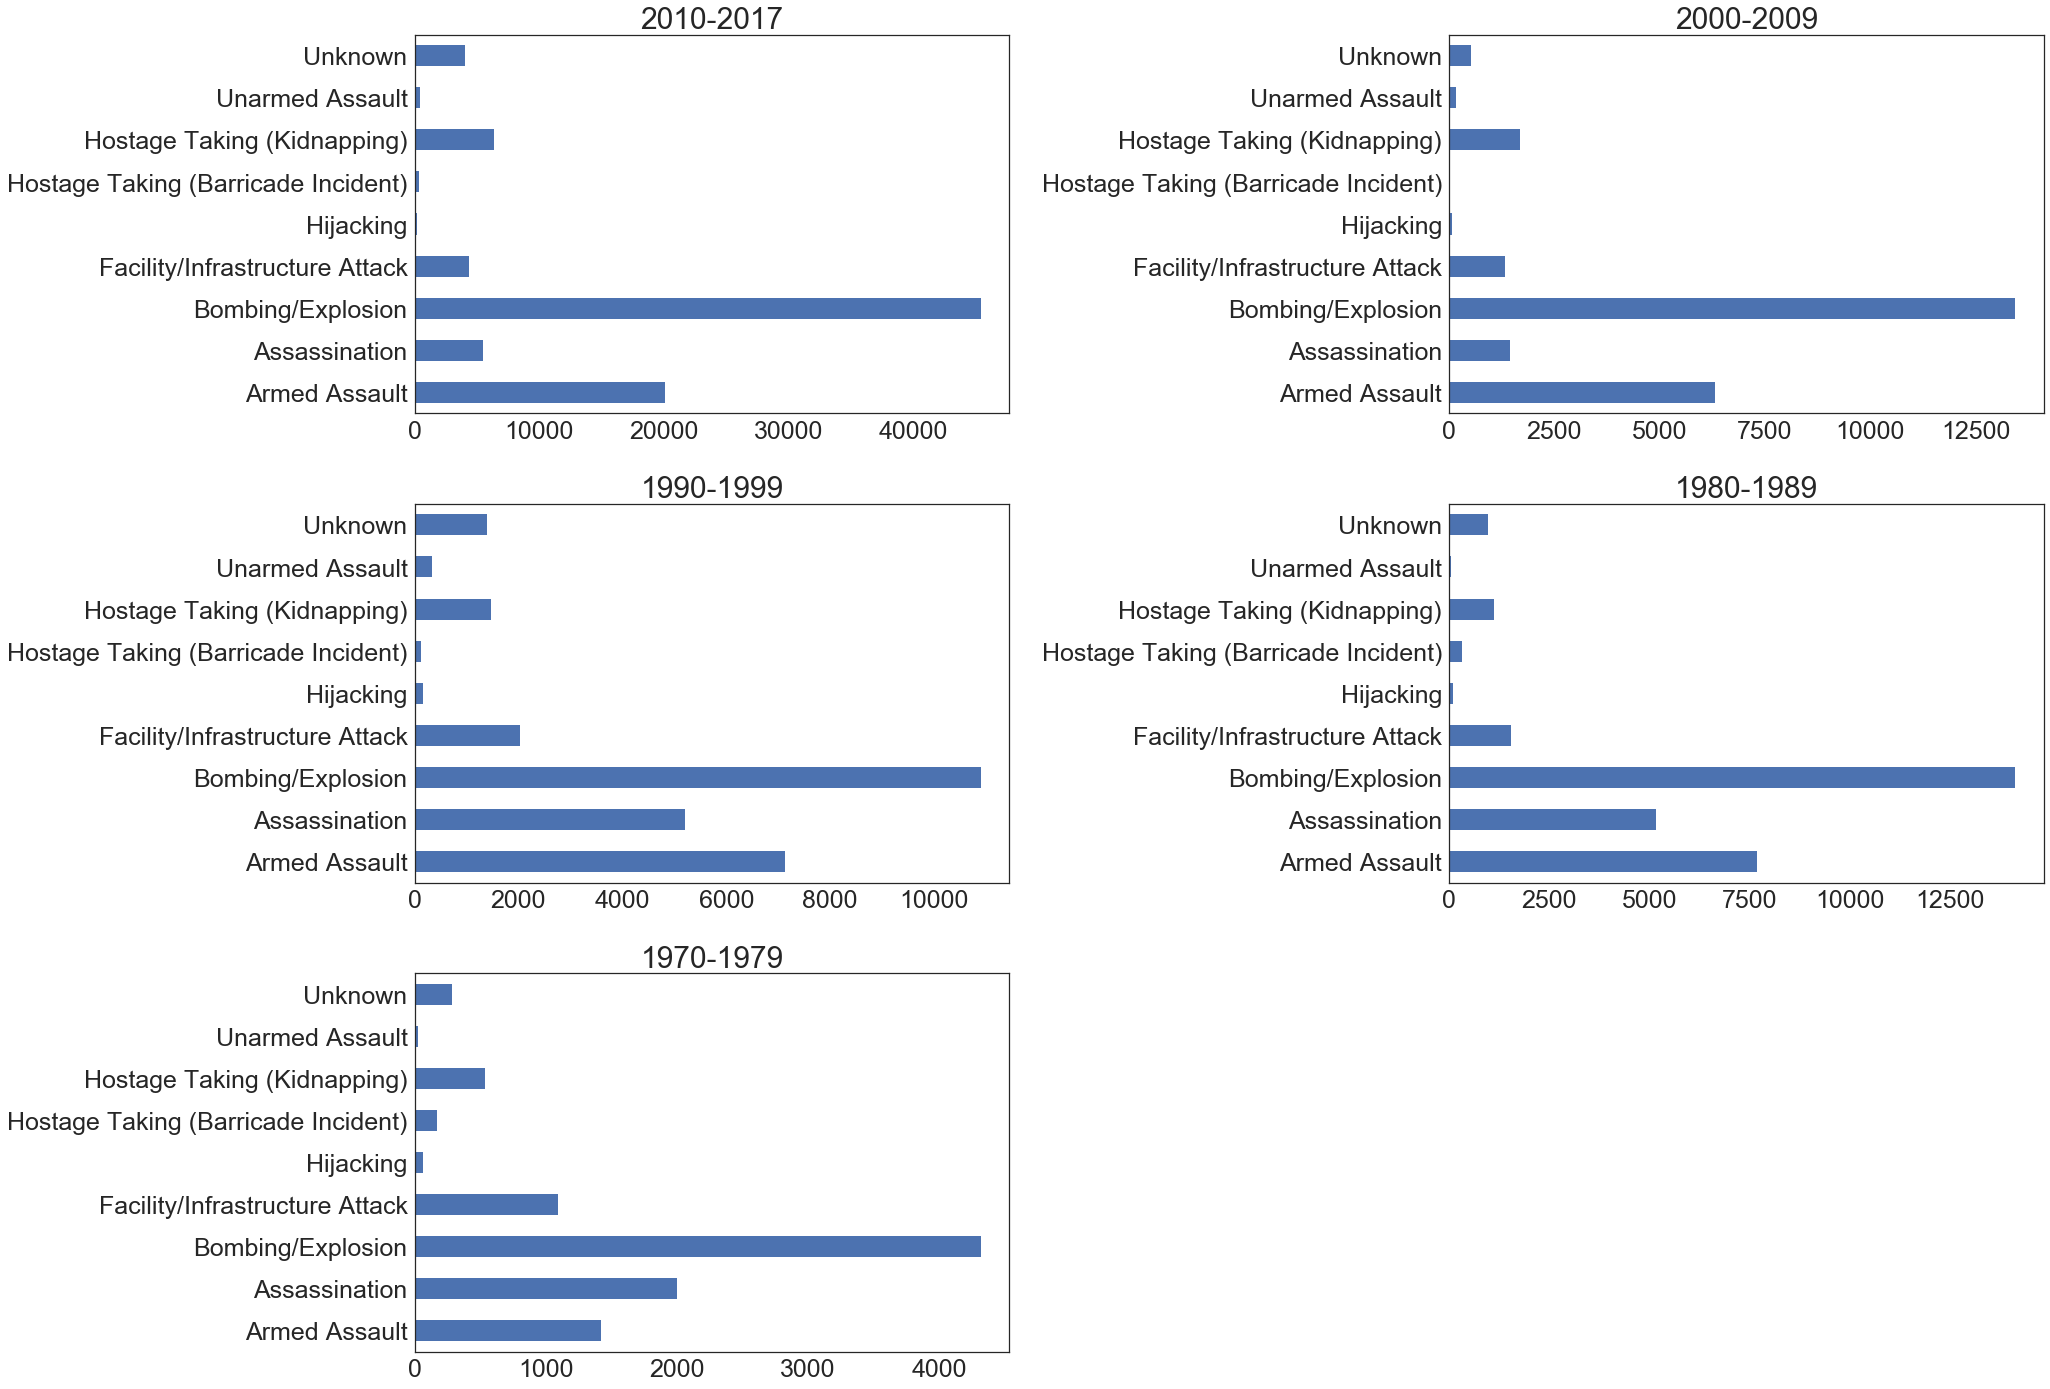

In [39]:
plot_by_years(kind='attacktype1_txt');

###  Types of target

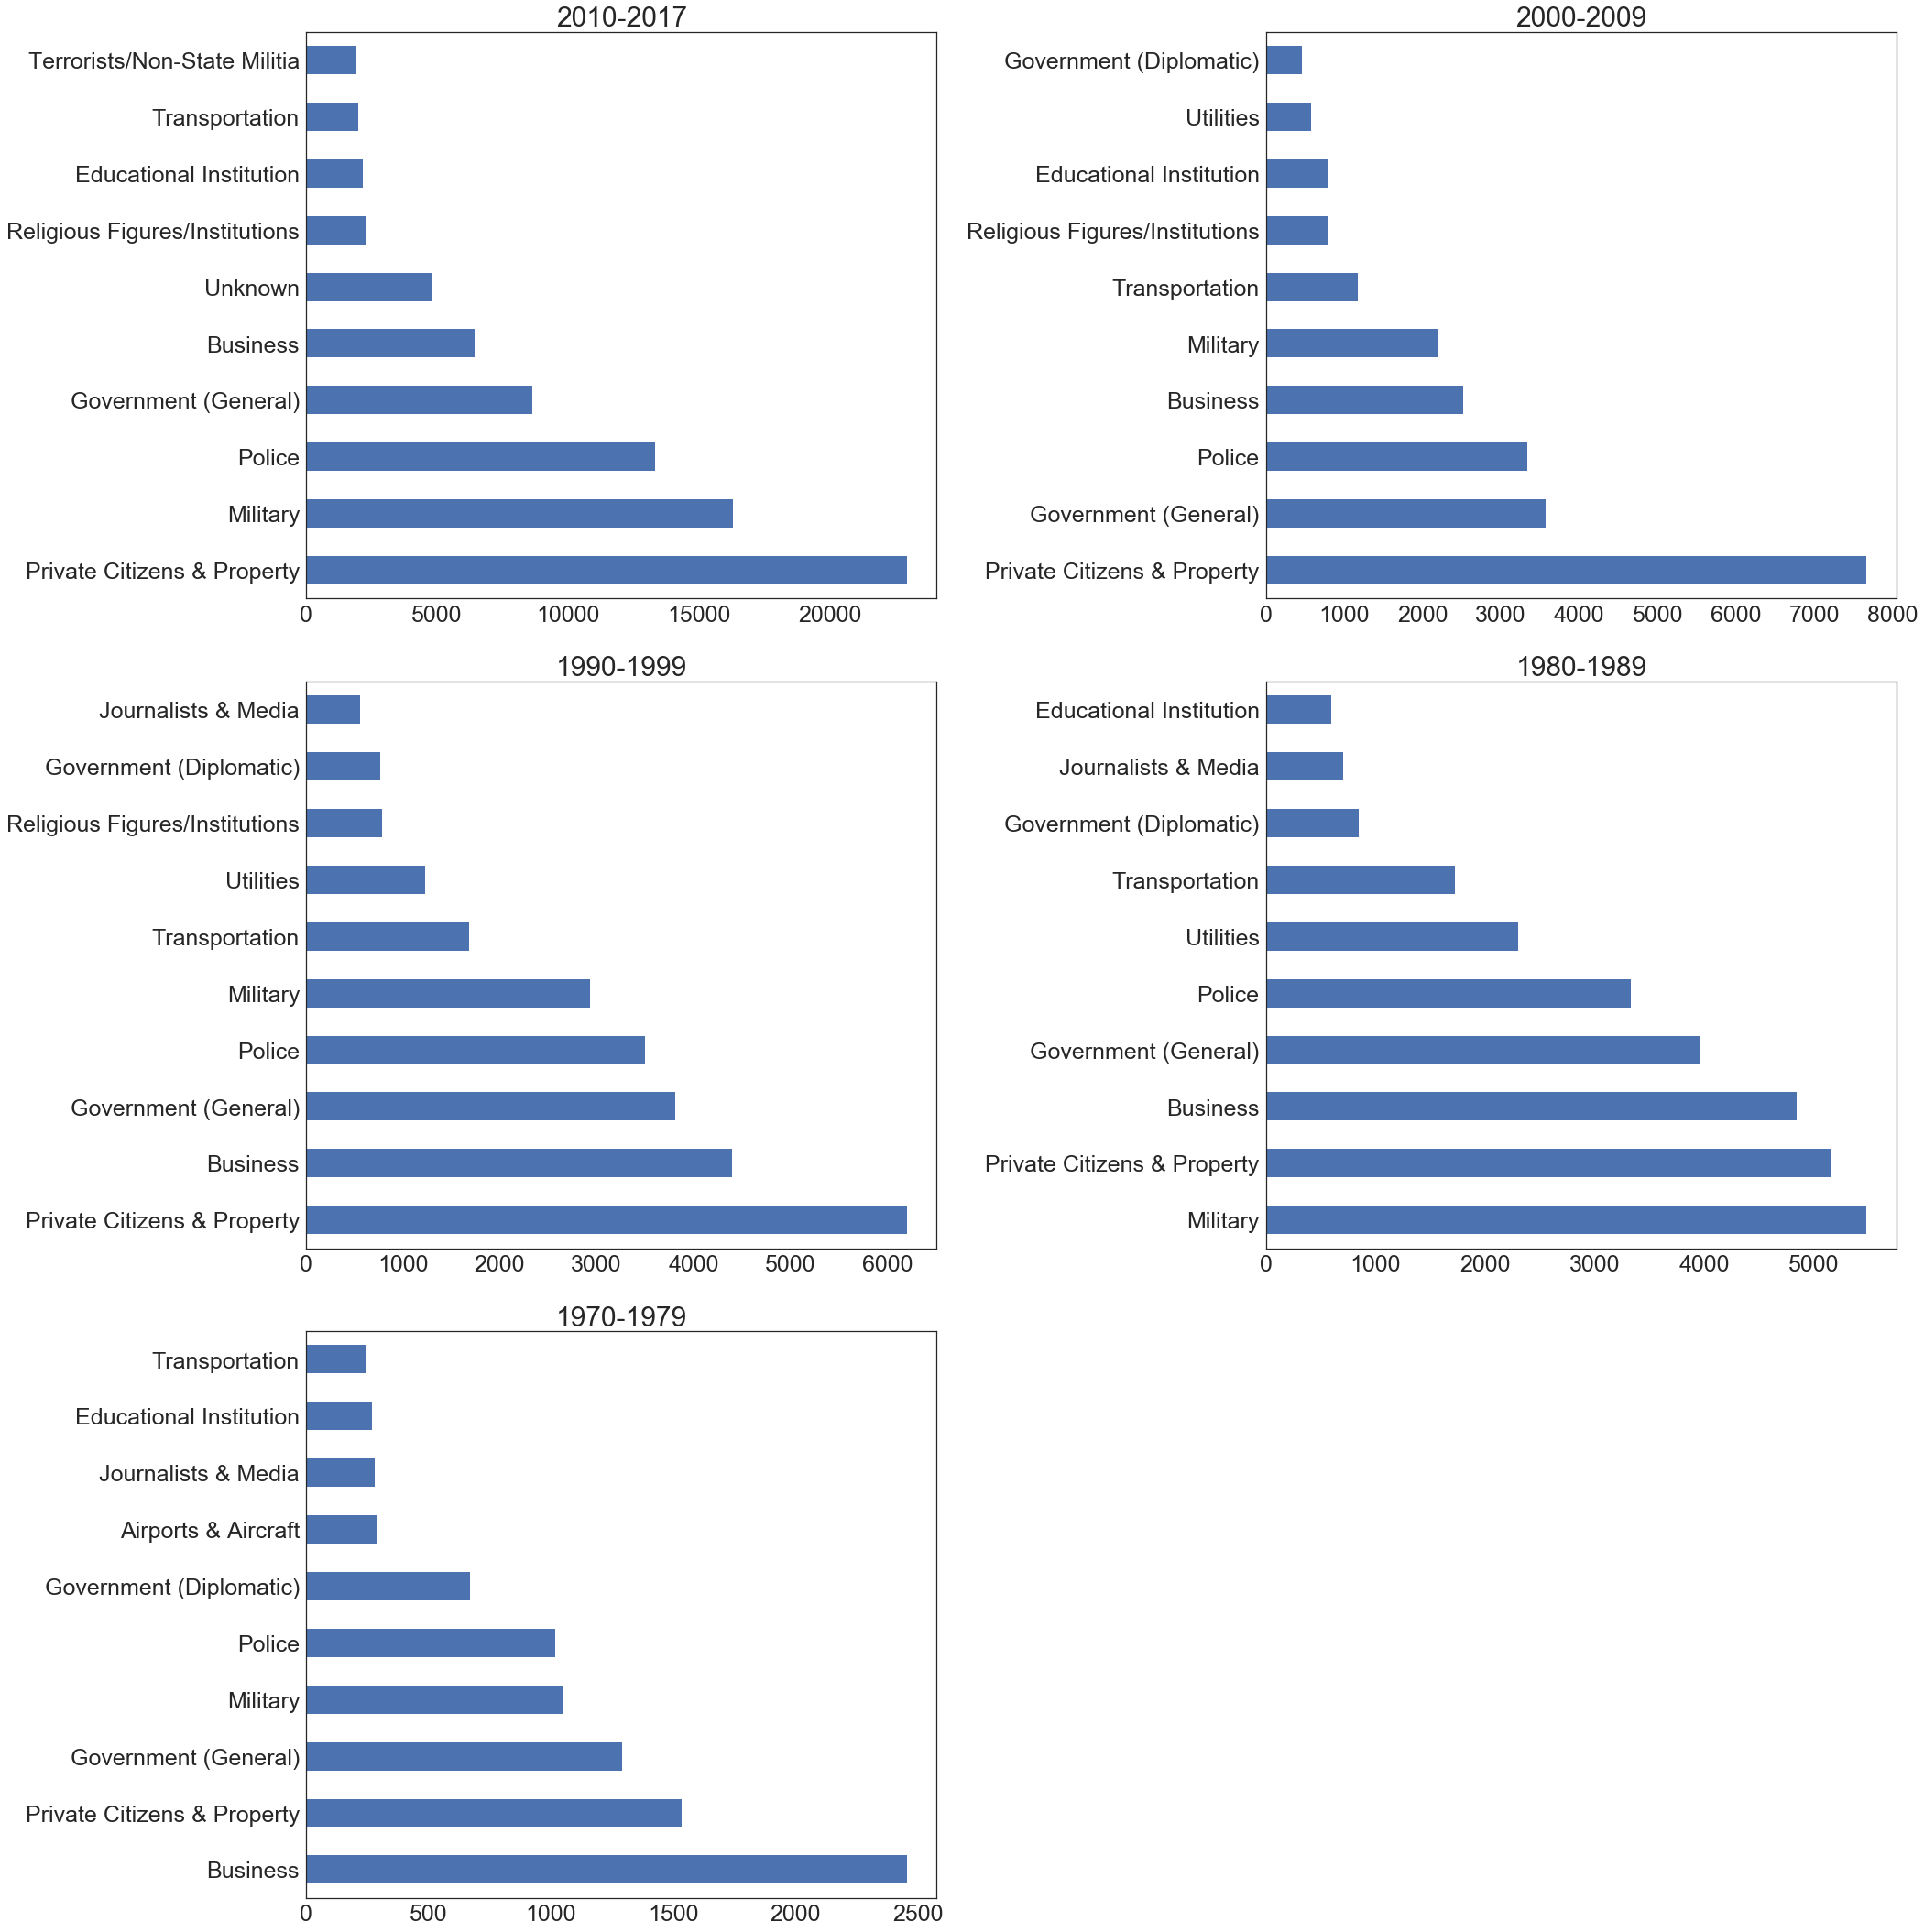

In [40]:
def plot_by_years(kind='region_txt',big=(30,20)):
    sns.set(style="white",font_scale=2.5)
    fig = plt.figure(figsize=big)
    ax1 = fig.add_subplot(3,2,1)
    ax1.set_title('2010-2017')
    ax1.set_ylabel('');
    data_ter[data_ter['iyear']>=2010]['eventid'].groupby(data_ter[kind]).count().sort_values(ascending=False)[:10].plot(kind='barh');
    ax1.set_ylabel('');
    ax2 = fig.add_subplot(3,2,2)
    ax2.set_title('2000-2009')
    data_ter[(data_ter['iyear']>=2000) & (data_ter['iyear']<2010)]['eventid'].groupby(data_ter[kind]).count().sort_values(ascending=False)[:10].plot(kind='barh');
    ax2.set_ylabel('');
    ax3 = fig.add_subplot(3,2,3)
    ax3.set_title('1990-1999')
    data_ter[(data_ter['iyear']>=1990) & (data_ter['iyear']<2000)]['eventid'].groupby(data_ter[kind]).count().sort_values(ascending=False)[:10].plot(kind='barh');
    ax3.set_ylabel('');
    ax4 = fig.add_subplot(3,2,4)
    ax4.set_title('1980-1989')
    data_ter[(data_ter['iyear']>=1980) & (data_ter['iyear']<1990)]['eventid'].groupby(data_ter[kind]).count().sort_values(ascending=False)[:10].plot(kind='barh');
    ax4.set_ylabel('');
    ax4 = fig.add_subplot(3,2,5)
    ax4.set_title('1970-1979')
    data_ter[(data_ter['iyear']>=1970) & (data_ter['iyear']<1980)]['eventid'].groupby(data_ter[kind]).count().sort_values(ascending=False)[:10].plot(kind='barh');
    plt.tight_layout()
    plt.ylabel('');
plot_by_years(kind='targtype1_txt',big=(30,30));

##  Middle_East&North_Africa

In [41]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


###  prepare data

**First,  import all the common modules we will be using.
We read the training and test datasets directly from the data TERRORISMs.**

In [42]:
terrorism = pd.read_csv('C:/Users/new/Desktop/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

In [43]:
terrorism.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terrorism=terrorism[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [44]:
terrorism['Region'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

In [45]:
east = terrorism[terrorism.Region == "Middle East & North Africa"]
east.head(5)

Year  Month  Day  Country                      Region        city  \
95   1970      2   28   Jordan  Middle East & North Africa      Hebron   
133  1970      3   14    Egypt  Middle East & North Africa  Alexandria   
158  1970      3   29  Lebanon  Middle East & North Africa      Beirut   
195  1970      4   15   Jordan  Middle East & North Africa       Amman   
226  1970      4   25   Turkey  Middle East & North Africa    Istanbul   

      latitude  longitude         AttackType  Killed  Wounded  \
95   31.530243  35.094162      Armed Assault     NaN      NaN   
133  31.198056  29.919167  Bombing/Explosion     0.0      2.0   
158  33.888523  35.503513  Bombing/Explosion     0.0      0.0   
195  31.950001  35.933331  Bombing/Explosion     0.0      0.0   
226  41.106178  28.689863  Bombing/Explosion     0.0      0.0   

                                          Target Summary  \
95                                   Tourist Bus     NaN   
133  United Arab Airlines Flight Antonov 24 Acft     NaN   
158                                 U.S. Embassy     NaN   
195                                   US Embassy     NaN   
226                                 EL AL Office     NaN   

                                                 Group  \
95                                             Unknown   
133                                            Unknown   
158  Popular Front for the Liberation of Palestine ...   
195  Popular Front for the Liberation of Palestine ...   
226                                       Palestinians   

                 Target_type Weapon_type Motive  
95                  Tourists    Firearms    NaN  
133      Airports & Aircraft  Explosives    NaN  
158  Government (Diplomatic)  Explosives    NaN  
195  Government (Diplomatic)  Explosives    NaN  
226      Airports & Aircraft  Explosives    NaN

**We use plt & sns to show thenumber of terrorist attacks between 1970 and 2017. It is obvious that the number of terrorists is growing year by year and reached its peak in 2014. We will show the exact values below**

**The fnlwgt variable has no predictive power, so it is removed.**

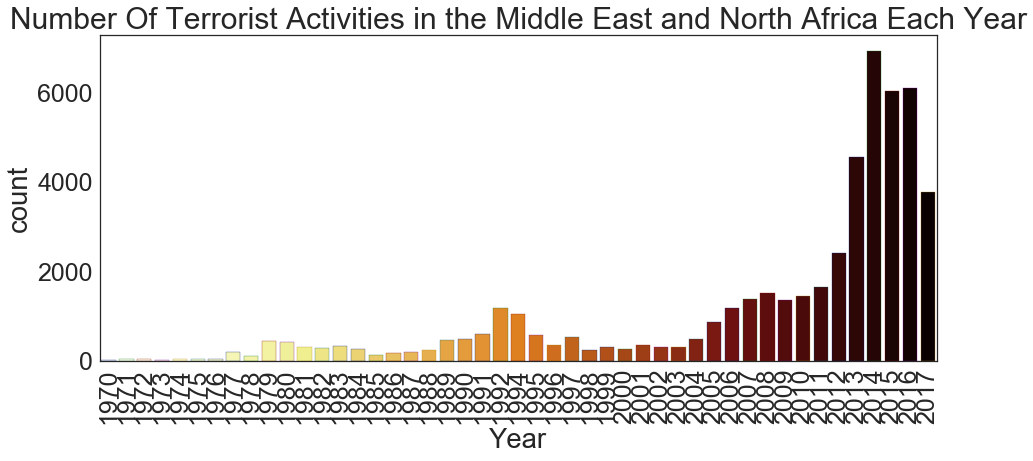

In [46]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=east,palette='afmhot_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities in the Middle East and North Africa Each Year')
plt.show()

**This shows the exact value of number of terrorist activities in the Middle East and North Africa**

**The range of year are between 19 and 6939, this number is growing very fast, as if someone was pushed it.**

In [47]:
east.Year.value_counts()

2014    6939
2016    6115
2015    6036
2013    4560
2017    3780
2012    2409
2011    1663
2008    1536
2010    1463
2007    1385
2009    1361
1992    1192
2006    1187
1994    1051
2005     882
1991     612
1995     590
1997     548
1990     494
2004     492
1989     465
1979     455
1980     437
1996     373
2001     362
1983     334
2002     326
1999     316
1981     312
2003     310
1982     290
2000     272
1984     268
1998     247
1988     246
1977     211
1987     202
1986     196
1985     133
1978     128
1971      55
1976      55
1972      53
1975      44
1974      42
1970      28
1973      19
Name: Year, dtype: int64

**Let's get a histogram for each country**

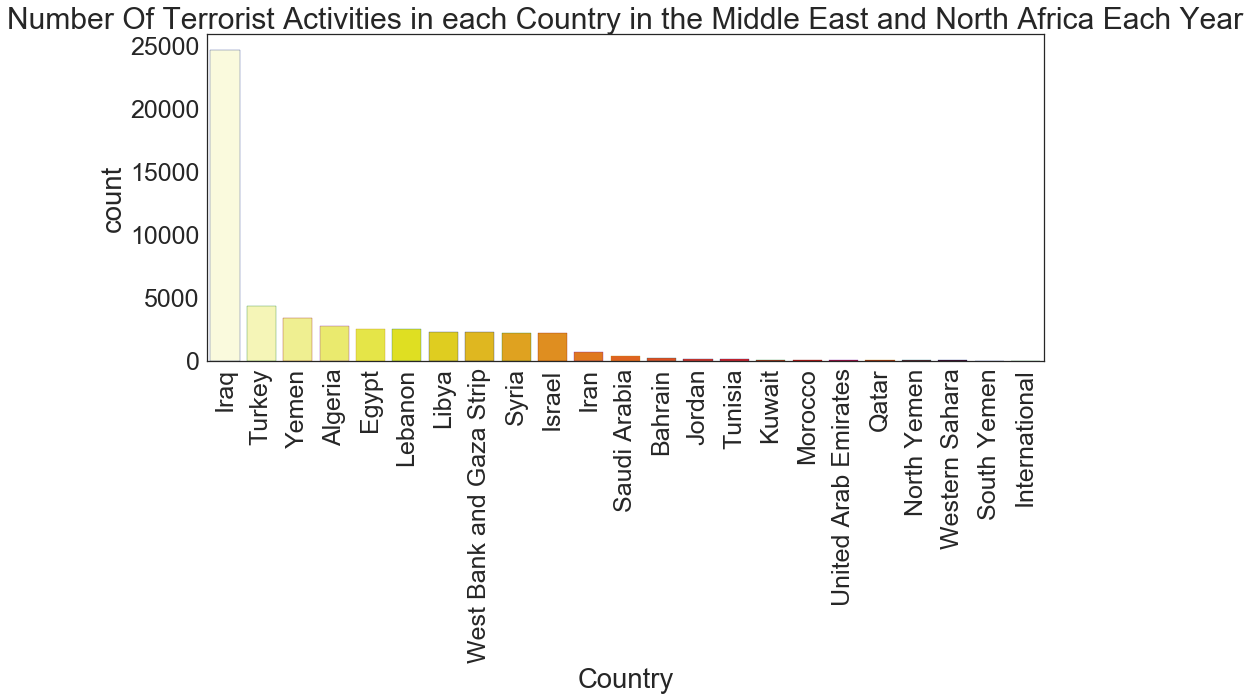

In [48]:
plt.subplots(figsize=(15,6))
sns.countplot('Country',data=east,palette='hot_r',edgecolor=sns.color_palette('dark',7),order=east['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities in each Country in the Middle East and North Africa Each Year')
plt.show()

**The number of terrorist activities in each country varies greatly, the most Iraq has reached 24,636 times.**

In [49]:
east.Country.value_counts()

Iraq                        24636
Turkey                       4292
Yemen                        3347
Algeria                      2743
Egypt                        2479
Lebanon                      2478
Libya                        2249
West Bank and Gaza Strip     2227
Syria                        2201
Israel                       2183
Iran                          684
Saudi Arabia                  371
Bahrain                       207
Jordan                        113
Tunisia                       109
Kuwait                         76
Morocco                        36
United Arab Emirates           22
Qatar                           7
North Yemen                     6
Western Sahara                  5
South Yemen                     2
International                   1
Name: Country, dtype: int64

In [50]:
east.city.value_counts().sort_values(ascending=False).head(10)

Baghdad      7589
Unknown      2665
Mosul        2265
Istanbul     1048
Kirkuk        925
Beirut        918
Benghazi      840
Baqubah       745
Jerusalem     636
Fallujah      579
Name: city, dtype: int64

### attacking method by terrorists
**This histogram shows the count of attacking methods by terrorists in the Middle East and North Africa.**

**Let's display a boxplot and histogram for east.**

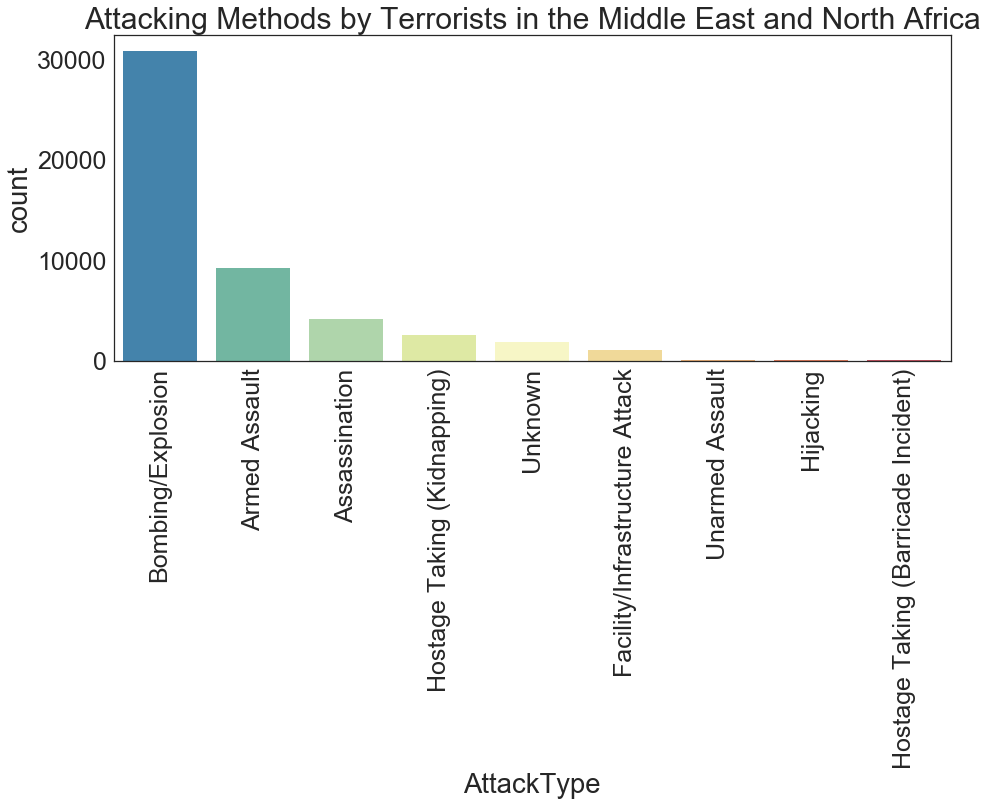

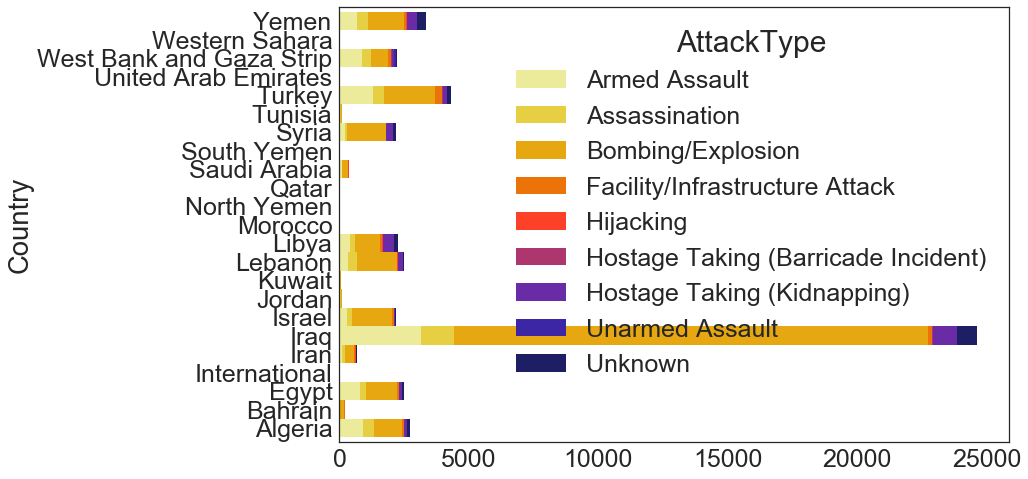

In [52]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=east,palette='Spectral_r',order=east['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists in the Middle East and North Africa')
plt.show()

pd.crosstab(east.Country,east.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('CMRmap_r',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

###  Number of attacks and killed in Middle East& North Africa country

**This part we shows the number of people died in attacks from Killes. Combined with the above data, it is not difficult to see that the more frequent terrorist activities, the higher the number of casualties in the country.**

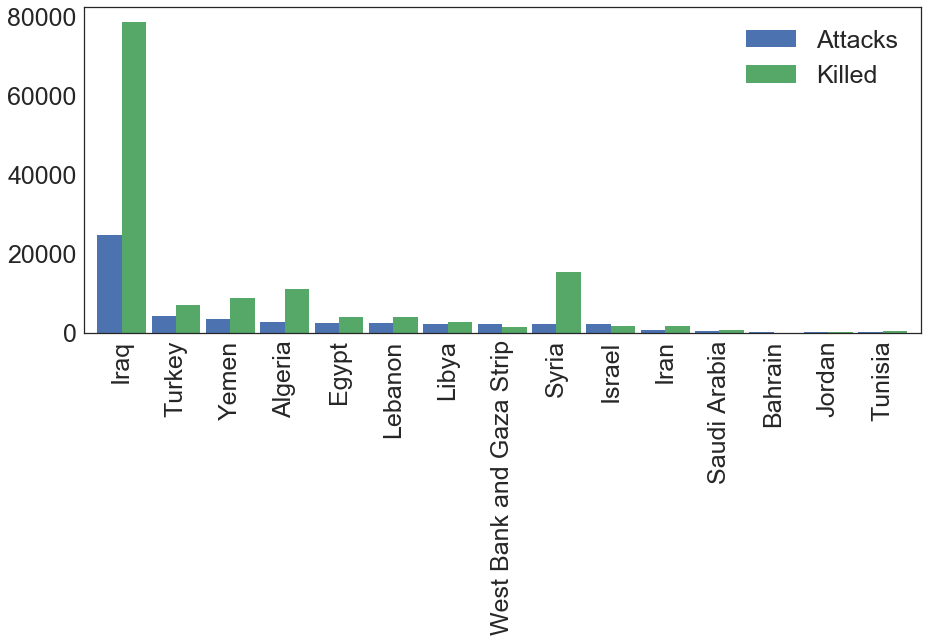

In [53]:
c_terror=east['Country'].value_counts()[:15].to_frame()
c_terror.columns=['Attacks']
c_kill=east.groupby('Country')['Killed'].sum().to_frame()
c_terror.merge(c_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(15,6)
plt.show()

###  targets of terrorists

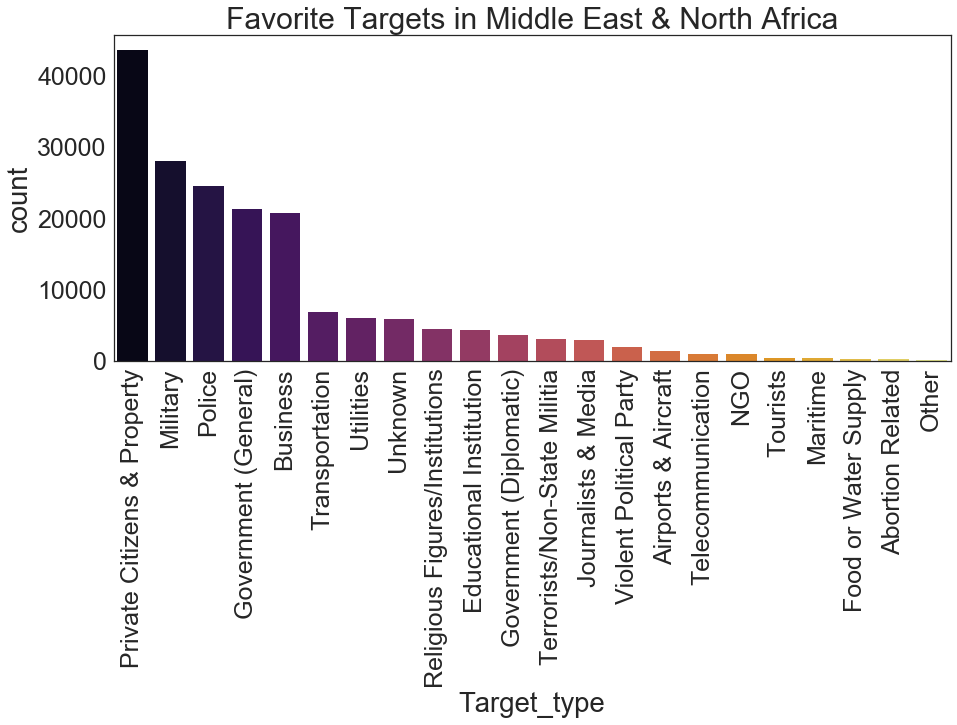

In [61]:
plt.subplots(figsize=(15,6))
sns.countplot(terrorism['Target_type'],palette='inferno',order=terrorism['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets in Middle East & North Africa')
plt.show()

###  Terrorist Groups with Highest Terror Attacks
**This two figure we see the variety of terrorist groups with highest terror attacks in Middle East & North Africa**

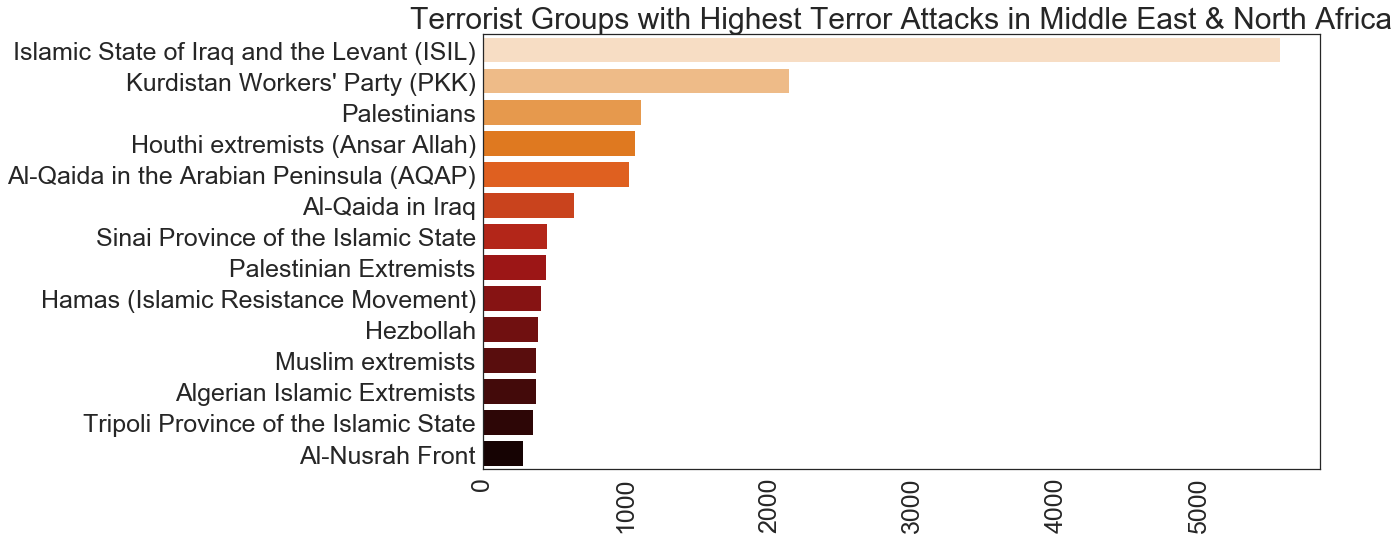

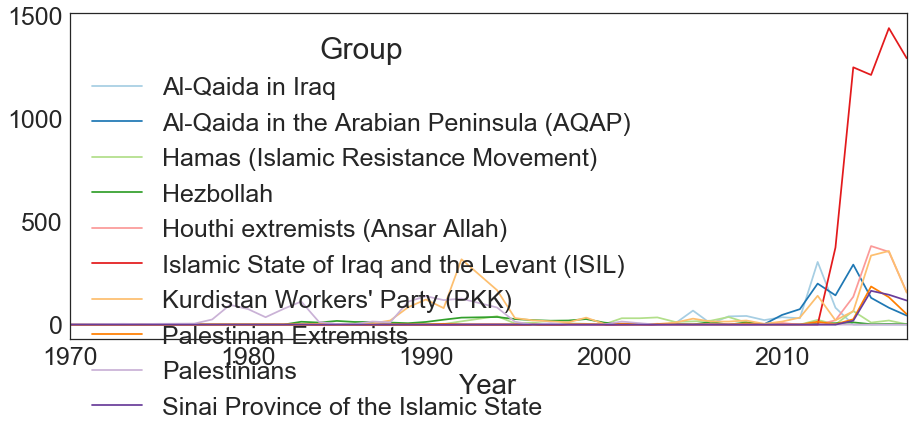

In [55]:
sns.barplot(east['Group'].value_counts()[1:15].values,east['Group'].value_counts()[1:15].index,palette=('gist_heat_r'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.title('Terrorist Groups with Highest Terror Attacks in Middle East & North Africa')
plt.show()

top10=east[east['Group'].isin(east['Group'].value_counts()[1:11].index)]
pd.crosstab(top10.Year,top10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(15,6)
plt.show()

###  Number of Terrorist Activities in each Month

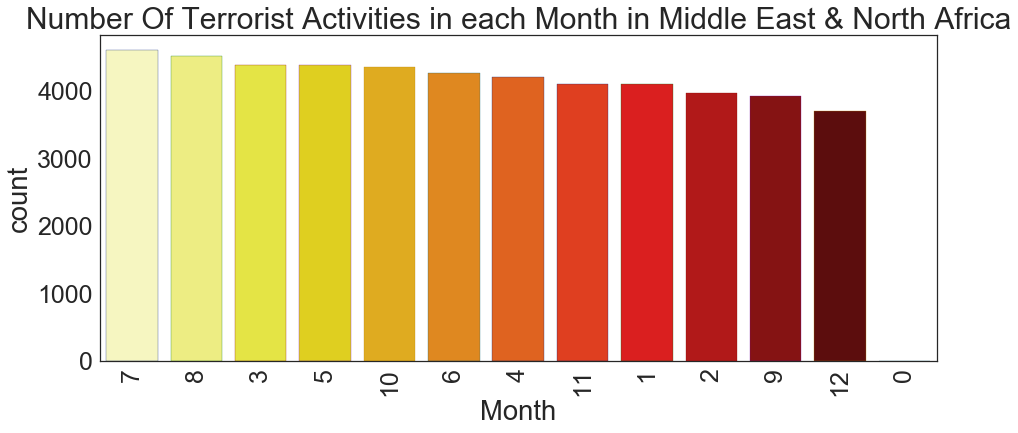

In [56]:
plt.subplots(figsize=(15,6))
sns.countplot('Month',data=east,palette='hot_r',edgecolor=sns.color_palette('dark',7),order=east['Month'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities in each Month in Middle East & North Africa')
plt.show()

###  Number of Terrorist Activities in each Day

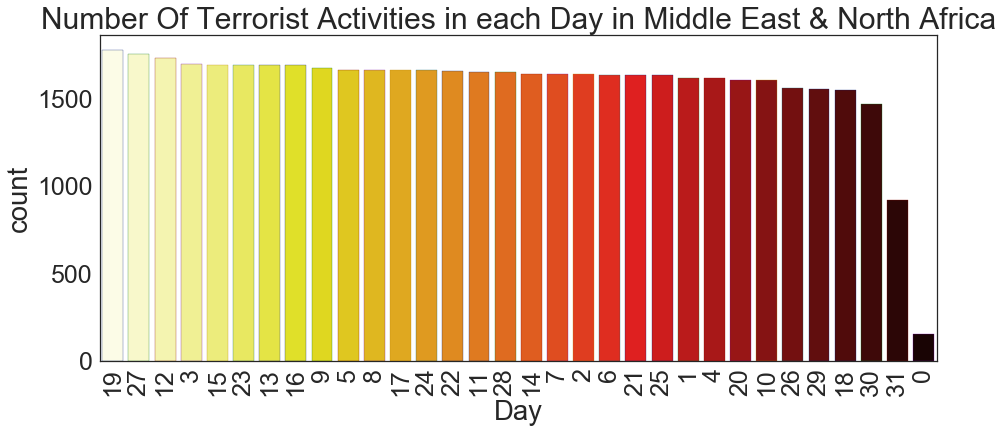

In [57]:
plt.subplots(figsize=(15,6))
sns.countplot('Day',data=east,palette='hot_r',edgecolor=sns.color_palette('dark',7),order=east['Day'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities in each Day in Middle East & North Africa')
plt.show()

###  Look at Iraq deeply

Iraq is the largest number ofterrorist Activities, so we look at it deeply

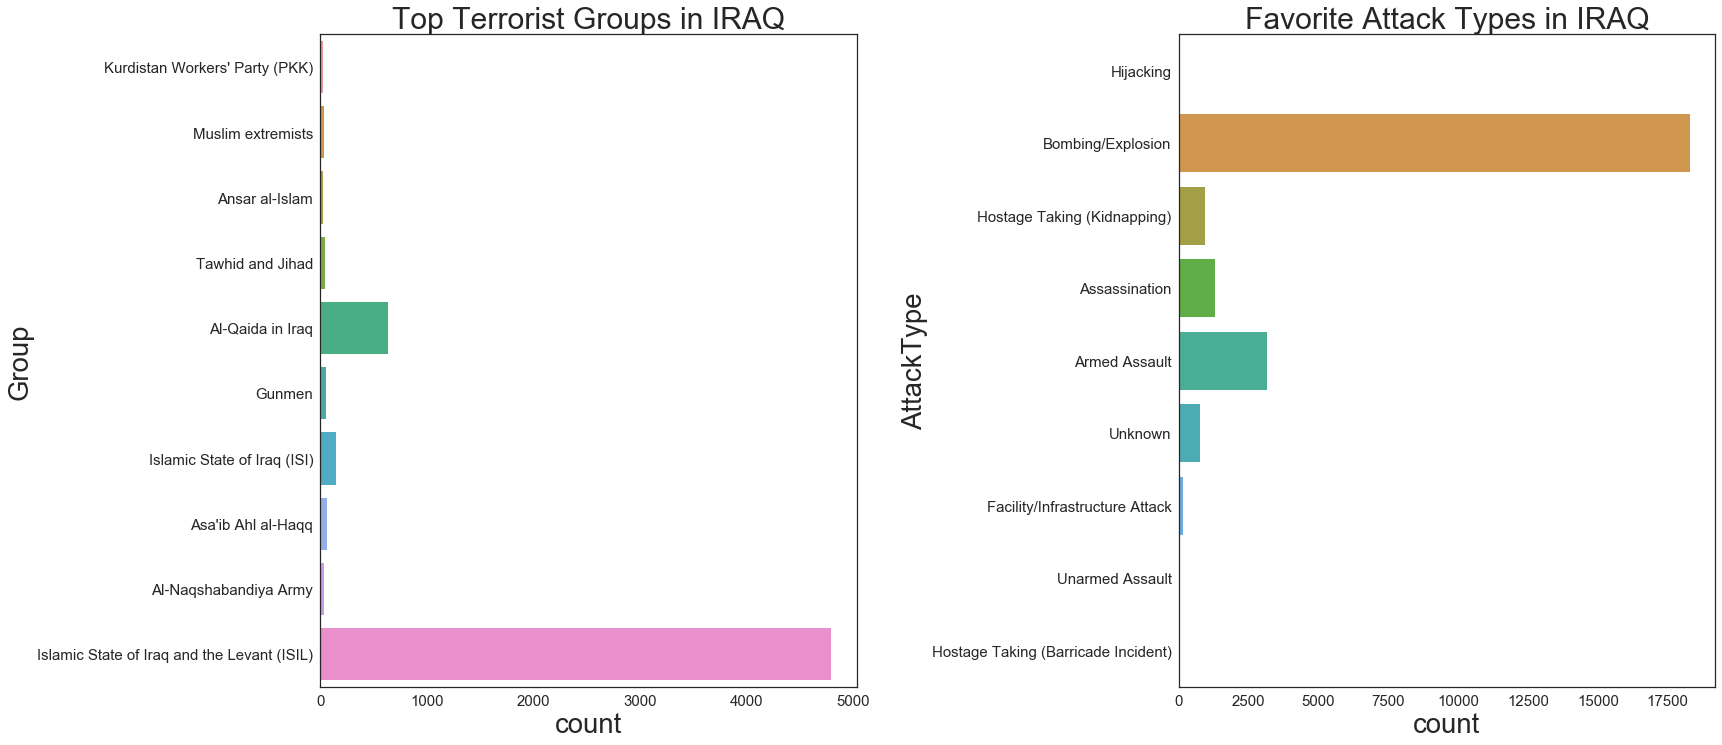

In [58]:
t_ıraq=east[east['Country']=='Iraq']
t_ıraq_f=t_ıraq.copy()
t_ıraq_f.dropna(subset=['latitude','longitude'],inplace=True)
location_ıraq=t_ıraq_f[['latitude','longitude']]
city_ıraq=t_ıraq_f['city']
killed_ıraq=t_ıraq_f['Killed']
wound_ıraq=t_ıraq_f['Wounded']
target_ıraq=t_ıraq_f['Target_type']

f,ax=plt.subplots(1,2,figsize=(25,12))
ıraq_groups=t_ıraq['Group'].value_counts()[1:11].index
ıraq_groups=t_ıraq[t_ıraq['Group'].isin(ıraq_groups)]
sns.countplot(y='Group',data=ıraq_groups,ax=ax[0])
sns.countplot(y='AttackType',data=t_ıraq,ax=ax[1])
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].set_title('Top Terrorist Groups in IRAQ')
ax[1].set_title('Favorite Attack Types in IRAQ')
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

###  Look at Turkey deeply

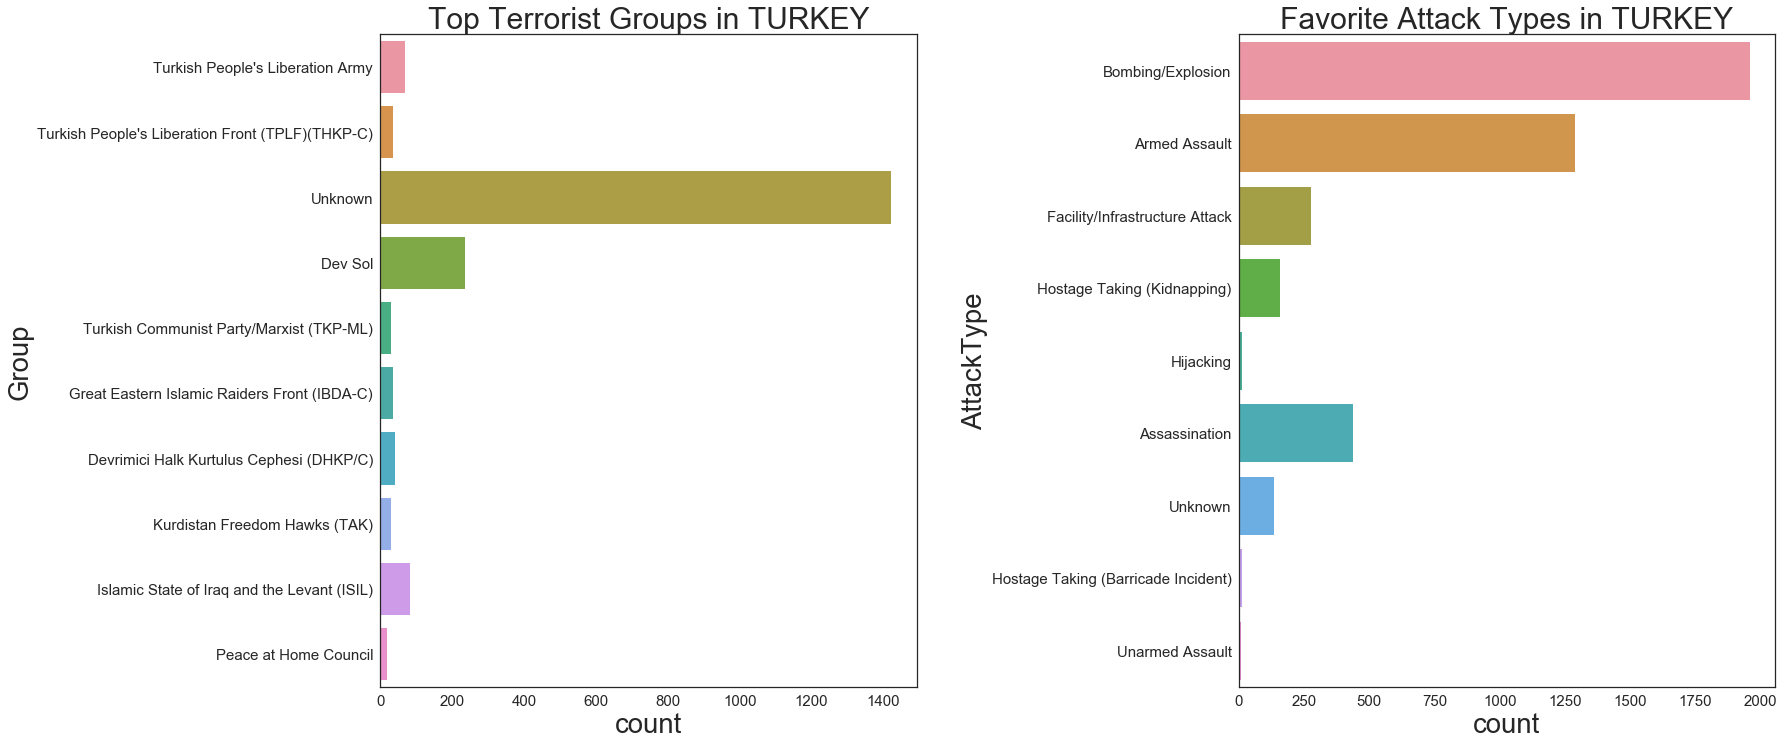

In [59]:
t_turkey=east[east['Country']=='Turkey']
t_turkey_f=t_turkey.copy()
t_turkey_f.dropna(subset=['latitude','longitude'],inplace=True)
location_turkey=t_turkey_f[['latitude','longitude']]
city_turkey=t_turkey_f['city']
killed_turkey=t_turkey_f['Killed']
wound_turkey=t_turkey_f['Wounded']
target_turkey=t_turkey_f['Target_type']

f,ax=plt.subplots(1,2,figsize=(25,12))
turkey_groups=t_turkey['Group'].value_counts()[1:11].index
turkey_groups=t_turkey[t_turkey['Group'].isin(turkey_groups)]
sns.countplot(y='Group',data=turkey_groups,ax=ax[0])
sns.countplot(y='AttackType',data=t_turkey,ax=ax[1])
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].set_title('Top Terrorist Groups in TURKEY')
ax[1].set_title('Favorite Attack Types in TURKEY')
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

##  Europe

In [62]:
import pandas as pd
import chardet
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

DATASET_FILE = "C:/Users/new/Desktop/globalterrorismdb_0718dist.csv"

with open(DATASET_FILE, 'rb') as f:
    encoding_info = chardet.detect(f.read(100000))  

# read csv file and select columns for further work
data = pd.read_csv(DATASET_FILE, 
                   encoding=encoding_info.get('encoding'), 
                   usecols = ['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 
                             'country_txt', 'region_txt', 'latitude', 'longitude', 
                             'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt', 'nkill'], 
                   dtype={'approxdate': object})
pd.set_option('display.max_columns', 15)

### data prepare and clean data

In [63]:
data.rename(columns={'eventid': 'incident_id', 'iyear': 'incident_year', 
                     'imonth': 'incident_month', 'iday': 'incident_day', 
                     'approxdate': 'approximate_date_of_incident', 
                     'extended': 'incident_duration', 'country_txt': 'country', 
                     'region_txt': 'region', 'latitude': 'latitude_of_the_city', 
                     'longitude': 'longitude_of_the_city', 
                     'attacktype1_txt': 'method_of_attack', 
                     'targtype1_txt': 'attack_target', 'weaptype1_txt': 'weapon_type', 
                     'nkill': 'number_of_fatalities'}, 
            inplace = True)

# print new column names 
data.columns

Index(['incident_id', 'incident_year', 'incident_month', 'incident_day',
       'approximate_date_of_incident', 'incident_duration', 'country',
       'region', 'latitude_of_the_city', 'longitude_of_the_city',
       'method_of_attack', 'attack_target', 'weapon_type',
       'number_of_fatalities'],
      dtype='object')

#### Preliminaries

In [64]:
# select data about 21st century (2001-2017) 
data.sort_values(by = 'incident_year')
data_21st_century = data[ (data['incident_year']>=2001) & (data['incident_year']<=2017)]

# select data about Europe and make a copy of original DataFrame
europe_21st_century = data_21st_century[(
    data_21st_century['region'] =='Western Europe') | (
    data_21st_century['region'] =='Eastern Europe')].copy(deep=True)

# check result
europe_21st_century.head()

incident_id  incident_year  incident_month  incident_day  \
71656  200101020003           2001               1             2   
71659  200101030002           2001               1             3   
71666  200101050005           2001               1             5   
71668  200101050007           2001               1             5   
71669  200101050008           2001               1             4   

      approximate_date_of_incident  incident_duration         country  \
71656                          NaN                  0      Yugoslavia   
71659                          NaN                  0     Switzerland   
71666                          NaN                  0          Russia   
71668                          NaN                  0  United Kingdom   
71669                          NaN                  0          Russia   

               region  latitude_of_the_city  longitude_of_the_city  \
71656  Eastern Europe             42.550000              21.900000   
71659  Western Europe             47.368650               8.539182   
71666  Eastern Europe             43.300000              45.866667   
71668  Western Europe             53.992120              -1.541812   
71669  Eastern Europe             43.219708              46.199835   

        method_of_attack                attack_target weapon_type  \
71656  Bombing/Explosion                       Police  Explosives   
71659  Bombing/Explosion          Airports & Aircraft  Explosives   
71666      Assassination         Government (General)    Firearms   
71668  Bombing/Explosion  Private Citizens & Property  Explosives   
71669  Bombing/Explosion         Government (General)  Explosives   

       number_of_fatalities  
71656                   0.0  
71659                   0.0  
71666                   1.0  
71668                   0.0  
71669                   0.0

In [65]:
print('Number of duplicates:', europe_21st_century.duplicated().sum())

Number of duplicates: 0


####  Checking for NaN Values

In [66]:
# check for NaN values 
europe_21st_century.isnull().sum()

incident_id                        0
incident_year                      0
incident_month                     0
incident_day                       0
approximate_date_of_incident    6420
incident_duration                  0
country                            0
region                             0
latitude_of_the_city              16
longitude_of_the_city             16
method_of_attack                   0
attack_target                      0
weapon_type                        0
number_of_fatalities             111
dtype: int64

####  Calculate median for number of fatalities

In [67]:
# calculate median for column number_of_fatalities
number_of_fatalities_median = europe_21st_century['number_of_fatalities'].median()
print('Median for column number_of_fatalities:', number_of_fatalities_median)

Median for column number_of_fatalities: 0.0


In [68]:
# fill missing values in column number_of_fatalities with median number_of_fatalities_median
europe_21st_century['number_of_fatalities'] = europe_21st_century['number_of_fatalities'].fillna(
    value = number_of_fatalities_median)

# drop missing values from columns latitude_of_the_city and longitude_of_the_city
europe_21st_century.dropna(subset = ['latitude_of_the_city', 'longitude_of_the_city'], 
                           inplace = True)

# count missing values one more time, to make sure, that they are gone
europe_21st_century.isnull().sum()

incident_id                        0
incident_year                      0
incident_month                     0
incident_day                       0
approximate_date_of_incident    6408
incident_duration                  0
country                            0
region                             0
latitude_of_the_city               0
longitude_of_the_city              0
method_of_attack                   0
attack_target                      0
weapon_type                        0
number_of_fatalities               0
dtype: int64

####  General Information about DataFrame

In [69]:
# print general information about DataFrame europe_21st_century
europe_21st_century.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6710 entries, 71656 to 181682
Data columns (total 14 columns):
incident_id                     6710 non-null int64
incident_year                   6710 non-null int64
incident_month                  6710 non-null int64
incident_day                    6710 non-null int64
approximate_date_of_incident    302 non-null object
incident_duration               6710 non-null int64
country                         6710 non-null object
region                          6710 non-null object
latitude_of_the_city            6710 non-null float64
longitude_of_the_city           6710 non-null float64
method_of_attack                6710 non-null object
attack_target                   6710 non-null object
weapon_type                     6710 non-null object
number_of_fatalities            6710 non-null float64
dtypes: float64(3), int64(5), object(6)
memory usage: 629.1+ KB


In [70]:
# unique values in column incident_year
europe_21st_century['incident_year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

In [71]:
# unique values in column incident_day
europe_21st_century['incident_day'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], dtype=int64)

####  The number of rows in column incident day contain 0

In [72]:
# count, how many rows in column incident_day contains 0
europe_21st_century.loc[europe_21st_century['incident_day'] == 0].count()

incident_id                     29
incident_year                   29
incident_month                  29
incident_day                    29
approximate_date_of_incident    29
incident_duration               29
country                         29
region                          29
latitude_of_the_city            29
longitude_of_the_city           29
method_of_attack                29
attack_target                   29
weapon_type                     29
number_of_fatalities            29
dtype: int64

####  All rows containing 0 value in column incident day

In [73]:
# print all rows which contains 0 value in column incident_day
europe_21st_century.loc[europe_21st_century['incident_day'] == 0]

incident_id  incident_year  incident_month  incident_day  \
71814   200102000001           2001               2             0   
71874   200102120002           2001               2             0   
71891   200102140011           2001               2             0   
73265   200110210001           2001              10             0   
73377   200111200003           2001              11             0   
74392   200207230003           2002               7             0   
74630   200210000001           2002              10             0   
74631   200210000002           2002              10             0   
74632   200210000003           2002              10             0   
74633   200210000004           2002              10             0   
74634   200210000005           2002              10             0   
74635   200210000006           2002              10             0   
74636   200210000007           2002              10             0   
74637   200210000008           2002              10             0   
74638   200210000009           2002              10             0   
74639   200210000010           2002              10             0   
74640   200210000011           2002              10             0   
74641   200210000012           2002              10             0   
74642   200210000013           2002              10             0   
74643   200210000014           2002              10             0   
74694   200210180003           2002              10             0   
74860   200212130007           2002              12             0   
89085   200810180012           2008              10             0   
94561   200912030019           2009              12             0   
95706   201003130017           2010               3             0   
97796   201008210009           2010               8             0   
103515  201110190011           2011              10             0   
103800  201111050040           2011              11             0   
104207  201111240033           2011              11             0   

       approximate_date_of_incident  incident_duration         country  \
71814          February 11-12, 2001                  0  United Kingdom   
71874          February 11-12, 2001                  0  United Kingdom   
71891          February 14-15, 2001                  0          Russia   
73265                    10/21/2001                  0  United Kingdom   
73377          November 19-20, 2001                  0           Spain   
74392                    07/24/2002                  1          Russia   
74630           October 17-18, 2002                  0          France   
74631           October 17-18, 2002                  0          France   
74632           October 17-18, 2002                  0          France   
74633           October 17-18, 2002                  0          France   
74634           October 17-18, 2002                  0          France   
74635           October 17-18, 2002                  0          France   
74636           October 17-18, 2002                  0          France   
74637           October 17-18, 2002                  0          France   
74638           October 17-18, 2002                  0          France   
74639           October 17-18, 2002                  0          France   
74640           October 17-18, 2002                  0          France   
74641           October 17-18, 2002                  0          France   
74642           October 17-18, 2002                  0          France   
74643           October 17-18, 2002                  0          France   
74694           October 17-18, 2002                  0          France   
74860          December 11-12, 2002                  0           Spain   
89085                  October 2008                  0         Austria   
94561                 December 2009                  0         Germany   
95706                    March 2010                  0          Greece   
97796         

In [74]:
# calculate median for column incident_day
incident_day_median = europe_21st_century['incident_day'].median()
print('Median for column incident_day:', incident_day_median)

Median for column incident_day: 15.0


####  Get the real value of approximate date of incident

In [75]:
# keep information about incident day in column approximate_date_of_incident and write it in format 'dd'
europe_21st_century['approximate_date_of_incident'] = europe_21st_century['approximate_date_of_incident'].replace(
regex={
    # match and change date format for all rows, which are written in format 'Month dd-dd, yyyy' (e.g. February 11-12, 2001)
    r'^([a-zA-Z]*)\s(\d{1,2})\-\d{1,2}\,\s(\d{4})$': '\g<2>',
    # match and change date format for rows, which are written in format 'Month yyyy' (e.g. October 2008)
    '^([a-zA-Z]*)\s(\d{4})$': '15',
    # match and change date format for rows, which are written in format 'mm/dd/yyyy' (e.g. 10/21/2001)
    '^(\d{1,2})/(\d{1,2})/(\d{4})$': '\g<2>'
})

# check if changes have been done
europe_21st_century.loc[europe_21st_century['incident_day'] == 0].head()

incident_id  incident_year  incident_month  incident_day  \
71814  200102000001           2001               2             0   
71874  200102120002           2001               2             0   
71891  200102140011           2001               2             0   
73265  200110210001           2001              10             0   
73377  200111200003           2001              11             0   

      approximate_date_of_incident  incident_duration         country  \
71814                           11                  0  United Kingdom   
71874                           11                  0  United Kingdom   
71891                           14                  0          Russia   
73265                           21                  0  United Kingdom   
73377                           19                  0           Spain   

               region  latitude_of_the_city  longitude_of_the_city  \
71814  Western Europe             54.893002              -6.208449   
71874  Western Europe             54.893002              -6.208449   
71891  Eastern Europe             43.014050              46.107380   
73265  Western Europe             54.607712              -5.956210   
73377  Western Europe             43.258434              -2.921819   

        method_of_attack                attack_target weapon_type  \
71814  Bombing/Explosion  Private Citizens & Property  Explosives   
71874  Bombing/Explosion  Private Citizens & Property  Explosives   
71891      Assassination         Government (General)    Firearms   
73265  Bombing/Explosion  Private Citizens & Property  Explosives   
73377  Bombing/Explosion                       Police  Explosives   

       number_of_fatalities  
71814                   0.0  
71874                   0.0  
71891                   1.0  
73265                   0.0  
73377                   0.0

####  Delete the influence of NaN and Missing value 

In [130]:
# replace 0 values in column incident_date with information from column approximate_date_of_incident.
europe_21st_century['incident_day'].replace(0, europe_21st_century['approximate_date_of_incident'], inplace=True)

# count 0 values in column incident_date to make sure, that they are gone
europe_21st_century.loc[europe_21st_century['incident_day'] == 0].count()

incident_id                     0
incident_year                   0
incident_month                  0
incident_day                    0
approximate_date_of_incident    0
incident_duration               0
country                         0
region                          0
latitude_of_the_city            0
longitude_of_the_city           0
method_of_attack                0
attack_target                   0
weapon_type                     0
number_of_fatalities            0
incident_date                   0
dtype: int64

####  Get the New Incident Date

In [77]:
# combine columns incident_year, incident_month and incident_day and create new column incident_date
# date format in column incident_date: yyyy-mm-dd
europe_21st_century['incident_date'] = europe_21st_century[
    'incident_year'].map(str) + '-' + europe_21st_century[
    'incident_month'].map(str) + '-' + europe_21st_century[
    'incident_day'].map(str)

europe_21st_century['incident_date'].head()

71656    2001-1-2
71659    2001-1-3
71666    2001-1-5
71668    2001-1-5
71669    2001-1-4
Name: incident_date, dtype: object

In [78]:
# change dtype for column incident_date to_datetime
europe_21st_century['incident_date']=pd.to_datetime(europe_21st_century['incident_date'], 
                                                    format='%Y-%m-%d', 
                                                    errors='coerce')

In [79]:
# print general information about DataFrame after changes 
europe_21st_century.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6710 entries, 71656 to 181682
Data columns (total 15 columns):
incident_id                     6710 non-null int64
incident_year                   6710 non-null int64
incident_month                  6710 non-null int64
incident_day                    6710 non-null int64
approximate_date_of_incident    302 non-null object
incident_duration               6710 non-null int64
country                         6710 non-null object
region                          6710 non-null object
latitude_of_the_city            6710 non-null float64
longitude_of_the_city           6710 non-null float64
method_of_attack                6710 non-null object
attack_target                   6710 non-null object
weapon_type                     6710 non-null object
number_of_fatalities            6710 non-null float64
incident_date                   6681 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(5), object(6)
memory usage: 681.5+ KB


####  Get Unique Country

In [80]:
# unique values in column country
europe_21st_century['country'].sort_values().unique()

array(['Albania', 'Austria', 'Belarus', 'Belgium', 'Bosnia-Herzegovina',
       'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Macedonia',
       'Malta', 'Moldova', 'Montenegro', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Russia', 'Serbia', 'Serbia-Montenegro',
       'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Ukraine',
       'United Kingdom', 'Yugoslavia'], dtype=object)

####  Get Unique Region

In [81]:
# unique values in column region
europe_21st_century['region'].sort_values().unique()

array(['Eastern Europe', 'Western Europe'], dtype=object)

####  Classify the region and country

In [82]:
# print countries by region
pd.options.display.max_colwidth = 230
europe_21st_century.groupby('region')['country'].unique()

region
Eastern Europe    [Yugoslavia, Russia, Macedonia, Kosovo, Croatia, Estonia, Bulgaria, Montenegro, Bosnia-Herzegovina, Albania, Belarus, Hungary, Czech Republic, Poland, Ukraine, Serbia-Montenegro, Latvia, Serbia, Romania, Moldova, Slovak Republic]
Western Europe                                                         [Switzerland, United Kingdom, Spain, Greece, Netherlands, Germany, France, Norway, Italy, Ireland, Cyprus, Belgium, Sweden, Austria, Finland, Denmark, Portugal, Iceland, Malta]
Name: country, dtype: object

In [83]:
# select rows in column country, that contains 'Serbia', 'Montenegro', 'Serbia-Montenegro' and 'Yugoslavia'
Yugoslavia_Serbia_Montenegro = europe_21st_century[(
    europe_21st_century['country'] =='Serbia') | (
    europe_21st_century['country'] =='Montenegro') | (
    europe_21st_century['country'] =='Serbia-Montenegro') | (
    europe_21st_century['country'] =='Yugoslavia')]

# check how many entries is in Yugoslavia_Serbia_Montenegro
Yugoslavia_Serbia_Montenegro.count()

incident_id                     51
incident_year                   51
incident_month                  51
incident_day                    51
approximate_date_of_incident     0
incident_duration               51
country                         51
region                          51
latitude_of_the_city            51
longitude_of_the_city           51
method_of_attack                51
attack_target                   51
weapon_type                     51
number_of_fatalities            51
incident_date                   51
dtype: int64

In [84]:
# write function to sort countries by date of formation
def get_slice_from_data(df, column, begin, end):
    return df.loc[ (df[column]>=begin) & (df[column]<=end)]  

def define_period(df, begin, end):
    return get_slice_from_data(df, 'incident_date', begin, end)

In [85]:
# Federal Republic of Yugoslavia (Yugoslavia): April 27, 1992 - Feb 3, 2003
# find all rows that match this period and check country names there 
# begin: yyyy-mm-dd
# end: yyyy-mm-dd
Yugoslavia = define_period(Yugoslavia_Serbia_Montenegro, '1992-04-27', '2003-02-03')
Yugoslavia['country'].sort_values().unique()

array(['Montenegro', 'Yugoslavia'], dtype=object)

In [86]:
# print rows with wrong country name
def find_wrong_name(df, wrong):
    return df.loc[ (df['country']==wrong)]
find_wrong_name(Yugoslavia, 'Montenegro')

incident_id  incident_year  incident_month  incident_day  \
72058  200103190005           2001               3            19   

      approximate_date_of_incident  incident_duration     country  \
72058                          NaN                  0  Montenegro   

               region  latitude_of_the_city  longitude_of_the_city  \
72058  Eastern Europe               42.4392                 19.266   

        method_of_attack                attack_target weapon_type  \
72058  Bombing/Explosion  Private Citizens & Property  Explosives   

       number_of_fatalities incident_date  
72058                   1.0    2001-03-19

In [87]:
# change country name Montenegro to country name Yugoslavia in row 72058 
europe_21st_century.loc[72058, 'country'] = europe_21st_century.loc[72058, 'country'].replace('Montenegro', 'Yugoslavia')

# check result
europe_21st_century.loc[[72058]]

incident_id  incident_year  incident_month  incident_day  \
72058  200103190005           2001               3            19   

      approximate_date_of_incident  incident_duration     country  \
72058                          NaN                  0  Yugoslavia   

               region  latitude_of_the_city  longitude_of_the_city  \
72058  Eastern Europe               42.4392                 19.266   

        method_of_attack                attack_target weapon_type  \
72058  Bombing/Explosion  Private Citizens & Property  Explosives   

       number_of_fatalities incident_date  
72058                   1.0    2001-03-19

In [88]:
# State Union of Serbia and Montenegro (Serbia and Montenegro): Feb 4, 2003 - June 3, 2006
Serbia_Montenegro = define_period(Yugoslavia_Serbia_Montenegro, '2003-02-04', '2006-06-03')
Serbia_Montenegro['country'].sort_values().unique()

array(['Serbia-Montenegro'], dtype=object)

In [89]:
# Serbia: from June 3, 2006 (independence restored on 5 June, 2006) 
# Montenegro: from June 3, 2006
# in this case I will use '31/12/2099' as an end date, because these countries still exist
Serbia_or_Montenegro = define_period(Yugoslavia_Serbia_Montenegro, '2006-06-04', '2099-12-31') 
Serbia_or_Montenegro['country'].sort_values().unique()

array(['Montenegro', 'Serbia'], dtype=object)

In [90]:
# unique values in column method_of_attack
europe_21st_century['method_of_attack'].sort_values().unique()

array(['Armed Assault', 'Assassination', 'Bombing/Explosion',
       'Facility/Infrastructure Attack', 'Hijacking',
       'Hostage Taking (Barricade Incident)',
       'Hostage Taking (Kidnapping)', 'Unarmed Assault', 'Unknown'], dtype=object)

In [91]:
# unique values in column attack_target
europe_21st_century['attack_target'].sort_values().unique()

array(['Airports & Aircraft', 'Business', 'Educational Institution',
       'Food or Water Supply', 'Government (Diplomatic)',
       'Government (General)', 'Journalists & Media', 'Maritime',
       'Military', 'NGO', 'Other', 'Police', 'Private Citizens & Property',
       'Religious Figures/Institutions', 'Telecommunication',
       'Terrorists/Non-State Militia', 'Tourists', 'Transportation',
       'Unknown', 'Utilities', 'Violent Political Party'], dtype=object)

In [92]:
# unique values in columweapon_type
europe_21st_century['weapon_type'].sort_values().unique()

array(['Chemical', 'Explosives', 'Fake Weapons', 'Firearms', 'Incendiary',
       'Melee', 'Other', 'Sabotage Equipment', 'Unknown',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'], dtype=object)

In [93]:
# basic statistical characteristics of numerical features
europe_21st_century.describe()

incident_id  incident_year  incident_month  incident_day  \
count  6.710000e+03    6710.000000     6710.000000   6710.000000   
mean   2.010941e+11    2010.874963        6.430104     15.602534   
std    4.848915e+08       4.847289        3.402776      8.752207   
min    2.001010e+11    2001.000000        1.000000      0.000000   
25%    2.008062e+11    2008.000000        4.000000      8.000000   
50%    2.013021e+11    2013.000000        7.000000     15.000000   
75%    2.015012e+11    2015.000000        9.000000     23.000000   
max    2.017123e+11    2017.000000       12.000000     31.000000   

       incident_duration  latitude_of_the_city  longitude_of_the_city  \
count        6710.000000           6710.000000            6710.000000   
mean            0.022951             46.909749              24.251850   
std             0.149758              5.333781              20.076763   
min             0.000000             33.675700             -21.895210   
25%             0.000000             42.985420               5.369780   
50%             0.000000             47.119004              30.472033   
75%             0.000000             50.543233              39.470314   
max             1.000000             65.825119             142.725341   

       number_of_fatalities  
count           6710.000000  
mean               0.957675  
std                7.753967  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max              344.000000

In [94]:
# Correlation coeficients
europe_21st_century.corr()

incident_id  incident_year  incident_month  \
incident_id               1.000000       0.999973        0.053734   
incident_year             0.999973       1.000000        0.046691   
incident_month            0.053734       0.046691        1.000000   
incident_day              0.048510       0.048272        0.004039   
incident_duration         0.029084       0.029209       -0.017619   
latitude_of_the_city      0.302177       0.302124        0.020387   
longitude_of_the_city     0.040140       0.039928        0.030054   
number_of_fatalities     -0.026919      -0.027044        0.016587   

                       incident_day  incident_duration  latitude_of_the_city  \
incident_id                0.048510           0.029084              0.302177   
incident_year              0.048272           0.029209              0.302124   
incident_month             0.004039          -0.017619              0.020387   
incident_day               1.000000           0.011851              0.013286   
incident_duration          0.011851           1.000000              0.005626   
latitude_of_the_city       0.013286           0.005626              1.000000   
longitude_of_the_city      0.006501           0.095465             -0.396447   
number_of_fatalities      -0.016204           0.081832             -0.007884   

                       longitude_of_the_city  number_of_fatalities  
incident_id                         0.040140             -0.026919  
incident_year                       0.039928             -0.027044  
incident_month                      0.030054              0.016587  
incident_day                        0.006501             -0.016204  
incident_duration                   0.095465              0.081832  
latitude_of_the_city               -0.396447             -0.007884  
longitude_of_the_city               1.000000              0.071766  
number_of_fatalities                0.071766              1.000000

In [96]:
# basic statistics on non-numerical features 
europe_21st_century.describe(include=['object'])

approximate_date_of_incident country          region  \
count                           302    6710            6710   
unique                          146      40               2   
top                              17  Russia  Eastern Europe   
freq                             15    1727            3767   

         method_of_attack                attack_target weapon_type  
count                6710                         6710        6710  
unique                  9                           21          10  
top     Bombing/Explosion  Private Citizens & Property  Explosives  
freq                 3569                         1611        3851

### THE data preparing is all done. Our team detele the influence the by the NaN Values and Missing Values, and we did the classiication. Then we could begin to the ANALYZING AND GRAPHING

###  data analyzing and graphing

####  Region

In [97]:
# count terrorist incidents by region
region_count = europe_21st_century['region'].value_counts()
region_count

Eastern Europe    3767
Western Europe    2943
Name: region, dtype: int64

Eastern Europe    56.140089
Western Europe    43.859911
Name: region, dtype: float64


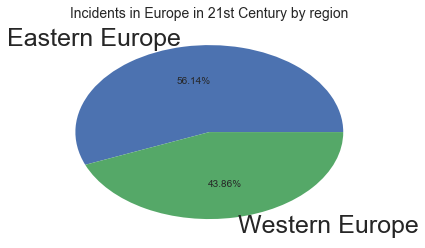

In [98]:
# terrorist incidents by region in percentage
region_percentage = region_count / europe_21st_century.shape[0] * 100
print(region_percentage)

values = [56.140089, 43.859911]
labels = ['Eastern Europe', 'Western Europe']
plt.pie(values, labels=labels, autopct='%.2f%%')
plt.title('Incidents in Europe in 21st Century by region', size=14)

**According to the pie chart here, poeple could get a very clear vision of incidents in Europe in 21st Century by Region. In 21st Century, people could know that more than 50% incidents by terriost happened in Eastern Europe and the 43.86% incidents happened in Western Europe. These two data is quite close. Therefore, terriosts have a little tendency to assault Eastern Europe.**

####  Get number of incidents sorted by country

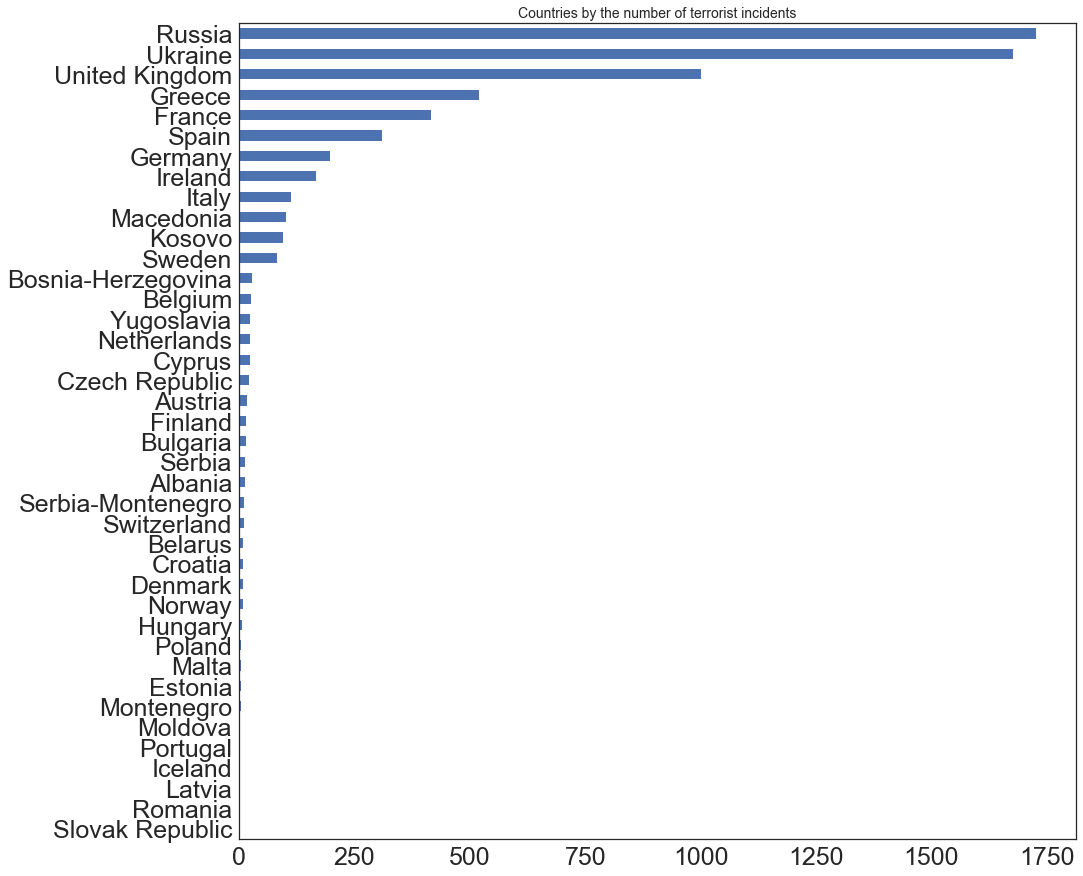

In [99]:
# print all countries in Europe by the number of terrorist incidents
europe_21st_century['country'].value_counts(ascending=True).plot(kind='barh', figsize=(15, 15))
plt.title('Countries by the number of terrorist incidents', size=14)

In [100]:
# print TOP 10 countries with the highest number of terrorist incidents
europe_21st_century['country'].value_counts().head(10)

Russia            1727
Ukraine           1676
United Kingdom    1000
Greece             519
France             416
Spain              309
Germany            196
Ireland            167
Italy              113
Macedonia          101
Name: country, dtype: int64

#### Conclution
**From the above data and graphs, people could have a clear vision for EUROPE's terrorists' tendency that they perfer to attact Eastern Europe and especially the RUSSIA, UKRAINE AND GREECE in Eastern Europe. AS for the Western Europe, they perfer to raise a incident in UK, FRANCE AND SPAIN.**

####  Get Number of incidents by year

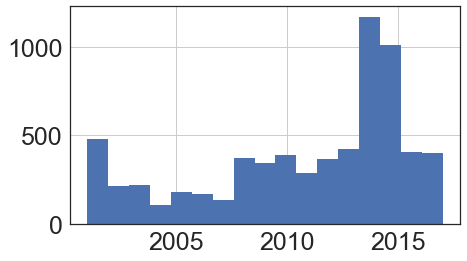

In [101]:
# terrorist incidents by year (histogram)
europe_21st_century['incident_date'].dt.year.hist(bins=17, figsize = (7, 4))

####  Get clear values for every year

In [102]:
# count number of terrorist incidents by year
number_of_incidents_by_year = europe_21st_century.groupby([europe_21st_century['incident_date'].dt.year]).size()
number_of_incidents_by_year

incident_date
2001.0     480
2002.0     214
2003.0     219
2004.0     105
2005.0     180
2006.0     167
2007.0     134
2008.0     370
2009.0     346
2010.0     392
2011.0     289
2012.0     366
2013.0     425
2014.0    1172
2015.0    1014
2016.0     407
2017.0     401
dtype: int64

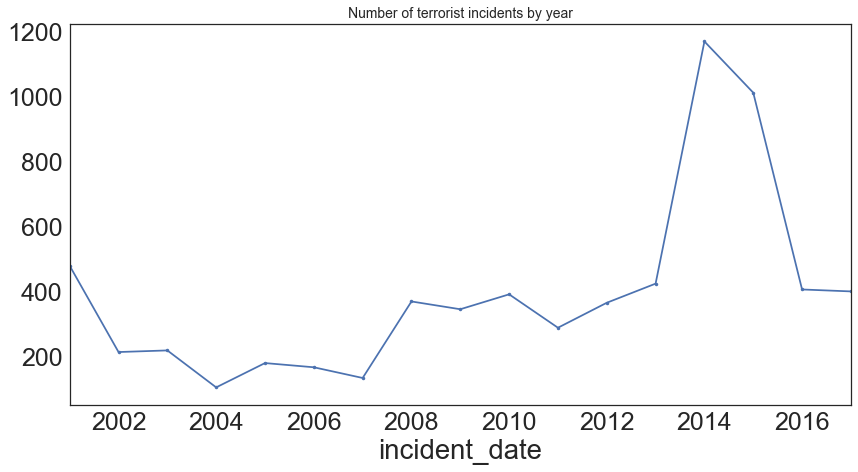

In [103]:
# number of terrorist incidents by year (visualization)
number_of_incidents_by_year.plot(rot=0, kind='line', figsize=(14, 7), style='.-')
plt.title('Number of terrorist incidents by year', size=14)

**According the histogram and line chart, people could have a very clear vision for number of terrorist incidents by year. People could see that the number of incidents in 2014 is highest and there is a decreasing from 2001 to 2007. What's more, the number of incidents become generally from 2008 to 2017 except the 2014.**

####  Get number of incident by month

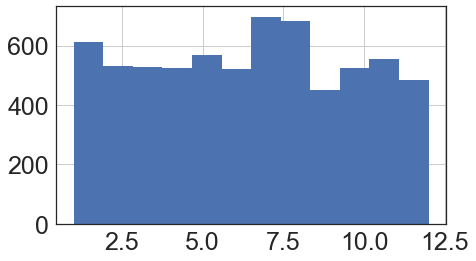

In [104]:
# terrorist incidents by month (histogram)
europe_21st_century['incident_date'].dt.month.hist(bins=12, figsize = (7, 4))

In [105]:
# count number of terrorist incidents by month, where '1' - January, '2' - February, '3' - March etc.
number_of_incidents_by_month = europe_21st_century.groupby([europe_21st_century['incident_date'].dt.month]).size()
number_of_incidents_by_month

incident_date
1.0     613
2.0     532
3.0     528
4.0     524
5.0     569
6.0     520
7.0     697
8.0     684
9.0     450
10.0    526
11.0    554
12.0    484
dtype: int64

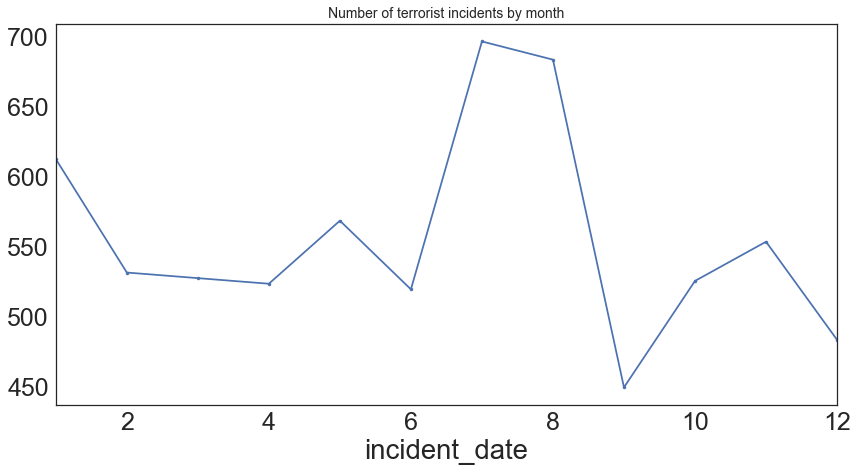

In [106]:
# number of terrorist incidents by month (visualization)
number_of_incidents_by_month.plot(rot=0, kind='line', figsize=(14, 7), style='.-')
plt.title('Number of terrorist incidents by month', size=14)

**According to pictures, the months that terrorists attacted most frequently are July and August and the months that terrorists attact least frequent are September and December. The number of attacting in other months are quite close.**

####  Get The Number of incidents by day

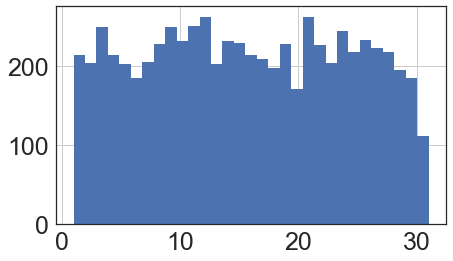

In [107]:
# terrorist incidents by day (histogram)
europe_21st_century['incident_date'].dt.day.hist(bins=31, figsize = (7, 4))

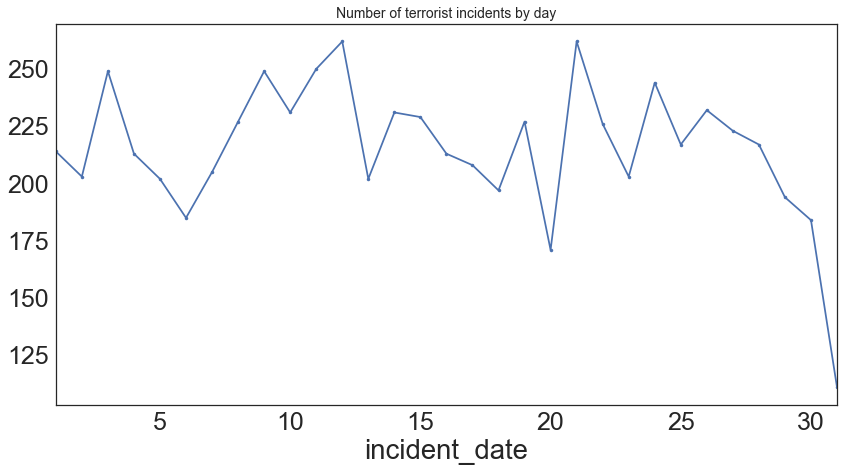

In [108]:
# number of terrorist incidents by day (visualization)
number_of_incidents_by_day = europe_21st_century.groupby([europe_21st_century['incident_date'].dt.day]).size()
number_of_incidents_by_day.plot(rot=0, kind='line', figsize=(14, 7), style='.-')
plt.title('Number of terrorist incidents by day', size=14)

**According to the Charts, the terrorists more prefer to attact on 12th and 21st of a month and less perfer to attact on 30th of the month. The number of other days are become generally. The tendency of the charts are not show very well.**

####  Show the Duration of the incidents

In [109]:
# count terrorist incidents by duration
# 0 - incident lasted less than 24 hours
# 1 - incident lasted more than 24 hours
by_duration_count = europe_21st_century['incident_duration'].value_counts()
by_duration_count

0    6556
1     154
Name: incident_duration, dtype: int64

In [110]:
# terrorist incidents by duration in percentage
by_duration_percentage = by_duration_count / europe_21st_century.shape[0] * 100
by_duration_percentage

0    97.704918
1     2.295082
Name: incident_duration, dtype: float64

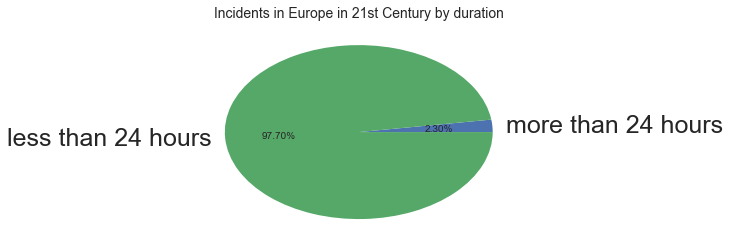

In [111]:
values = [2.295082, 97.704918]
labels = ['more than 24 hours', 'less than 24 hours']
plt.pie(values, labels=labels, autopct='%.2f%%')
plt.title('Incidents in Europe in 21st Century by duration', size=14)

**From the pie chart, people could see that the duration of 97.70% incidents in Europe is less than 24 hours and only 2.30% incidents in Europe is more than 24 hours. In other words, the most incidents in Europe are ended very quicky or terrorists in Europe pefer to do the short term attacting.**

####  Analyzing the distribution of the more than 24h incidents

In [112]:
duration_more_than_24h = europe_21st_century.loc[(europe_21st_century['incident_duration'] ==1)]
duration_more_than_24h['country'].value_counts()

Ukraine           108
Russia             33
Macedonia           6
United Kingdom      3
France              2
Ireland             1
Yugoslavia          1
Name: country, dtype: int64

In [113]:
# define seasons
def define_season(data, month_1, month_2, month_3):
    season = data[(data['incident_date'].dt.month==month_1) | 
                  (data['incident_date'].dt.month==month_2) | 
                  (data['incident_date'].dt.month==month_3)]
    return season

winter = define_season(europe_21st_century, 1, 2, 12)
spring = define_season(europe_21st_century, 3, 4, 5)
summer = define_season(europe_21st_century, 6, 7, 8)
autumn = define_season(europe_21st_century, 9, 10, 11)

In [114]:
# count number of terrorist incidents by season
incidents_winter = winter['incident_date'].dt.month.count()
print('Number of terrorist incidents in winter:', incidents_winter)

incidents_spring = spring['incident_date'].dt.month.count()
print('Number of terrorist incidents in spring:', incidents_spring)

incidents_summer = summer['incident_date'].dt.month.count()
print('Number of terrorist incidents in summer:', incidents_summer)

incidents_autumn = autumn['incident_date'].dt.month.count()
print('Number of terrorist incidents in winter:', incidents_autumn)

Number of terrorist incidents in winter: 1629
Number of terrorist incidents in spring: 1621
Number of terrorist incidents in summer: 1901
Number of terrorist incidents in winter: 1530


### Conclusion
**In part 2, we analyzed and graphed the data about the time of incident. Our team find out that the terrorists in Europe have a very clear tendency for their attacting time. They prefer to do the terrorist incidents on JULY AND AUGUST. THEN, 12th and and 21st of the month is the date they did the incidents most frequently. In addition, they also prefer thet show-term attacting, which is less than 24h. WAHT'S MORE, they did the terrorist attacting most frequently in 2014.**

###  Falalities
####  Counting the fatalities in Different Season

In [115]:
# sum number of fatalities by season
fatalities_winter = winter['number_of_fatalities'].sum()
print('Number of fatalities in winter:', fatalities_winter)

fatalities_spring = spring['number_of_fatalities'].sum()
print('Number of fatalities in spring:', fatalities_spring)

fatalities_summer = summer['number_of_fatalities'].sum()
print('Number of fatalities in summer:', fatalities_summer)

fatalities_autumn = autumn['number_of_fatalities'].sum()
print('Number of fatalities in autumn:', fatalities_autumn)

Number of fatalities in winter: 1154.0
Number of fatalities in spring: 1319.0
Number of fatalities in summer: 2174.0
Number of fatalities in autumn: 1774.0


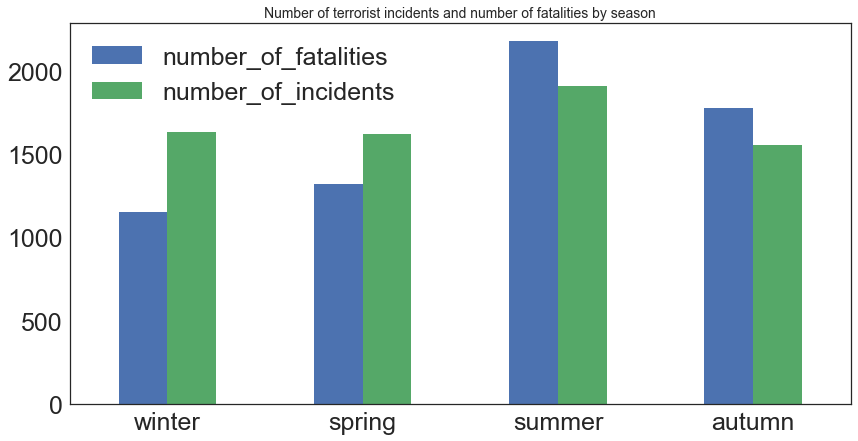

In [116]:
# number of terrorist incidents and number of fatalities by season (visualization)
number_of_incidents = [1638, 1624, 1909, 1555]
number_of_fatalities = [1155, 1321, 2180, 1782]
seasons = ['winter', 'spring', 'summer', 'autumn']
df = pd.DataFrame({'number_of_incidents': number_of_incidents, 
                  'number_of_fatalities': number_of_fatalities}, index=seasons)
ax = df.plot.bar(rot=0, figsize=(14, 7))
plt.title('Number of terrorist incidents and number of fatalities by season', size=14)

In [117]:
# terrorist incidents by season (percentage)
incidents_winter_pct = incidents_winter / europe_21st_century.shape[0] * 100
incidents_spring_pct = incidents_spring / europe_21st_century.shape[0] * 100
incidents_summer_pct = incidents_summer / europe_21st_century.shape[0] * 100
incidents_autumn_pct = incidents_autumn / europe_21st_century.shape[0] * 100

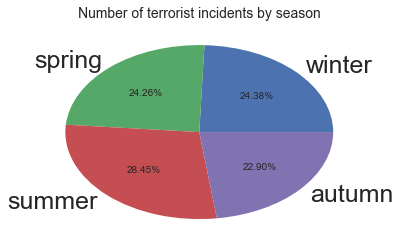

In [118]:
# terrorist incidents by season (visualization)
values = [incidents_winter_pct, incidents_spring_pct, incidents_summer_pct, incidents_autumn_pct]
labels = ['winter', 'spring', 'summer', 'autumn']
plt.pie(values, labels=labels, autopct='%.2f%%')
plt.title('Number of terrorist incidents by season', size=14)

In [119]:
# total number of fatalities
number_of_fatalities_total = europe_21st_century['number_of_fatalities'].sum() 

# number of fatalities by season (percentage)
fatalities_winter_pct = fatalities_winter / number_of_fatalities_total * 100
fatalities_spring_pct = fatalities_spring / number_of_fatalities_total * 100
fatalities_summer_pct = fatalities_summer / number_of_fatalities_total * 100
fatalities_autumn_pct = fatalities_autumn / number_of_fatalities_total * 100

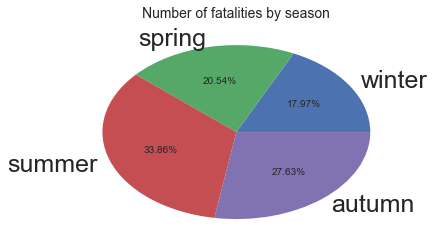

In [120]:
# number of fatalities by season (visualization)
values = [fatalities_winter_pct, fatalities_spring_pct, fatalities_summer_pct, fatalities_autumn_pct]
labels = ['winter', 'spring', 'summer', 'autumn']
plt.pie(values, labels=labels, autopct='%.2f%%')
plt.title('Number of fatalities by season', size=14)

From these TWO GRAPHS, the number of fatalities and incidents in Summer are highest. The number of autumn's incidents is lowest and the number of fatlities in winter is lowest. Terroists show the high tendency of attacting in summer and becom generally in other three seasons.

####  Get Clear Vision for Column Number of Fatalities

In [121]:
# basic statistical characteristics for column number_of_fatalities
europe_21st_century['number_of_fatalities'].describe()

count    6710.000000
mean        0.957675
std         7.753967
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       344.000000
Name: number_of_fatalities, dtype: float64

In [122]:
# print incident with the highest number of fatalities
europe_21st_century[europe_21st_century['number_of_fatalities'] == europe_21st_century['number_of_fatalities'].max()]

incident_id  incident_year  incident_month  incident_day  \
76953  200409010002           2004               9             1   

      approximate_date_of_incident  incident_duration country          region  \
76953                          NaN                  1  Russia  Eastern Europe   

       latitude_of_the_city  longitude_of_the_city  \
76953             43.191626              44.541763   

                          method_of_attack            attack_target  \
76953  Hostage Taking (Barricade Incident)  Educational Institution   

      weapon_type  number_of_fatalities incident_date  
76953  Explosives                 344.0    2004-09-01

####  Get the Top 10 Incidents by Number of Fatalities

In [123]:
# TOP 10 incidents by number of fatalities
europe_21st_century.sort_values(by='number_of_fatalities', ascending=False).head(10)

incident_id  incident_year  incident_month  incident_day  \
76953   200409010002           2004               9             1   
135125  201407170031           2014               7            17   
140104  201411060009           2014              11             6   
74706   200210230004           2002              10            23   
151661  201508100061           2015               8            10   
155389  201511130008           2015              11            13   
164724  201607140001           2016               7            14   
137241  201408310092           2014               8            31   
148916  201506030018           2015               6             3   
76326   200403110003           2004               3            11   

       approximate_date_of_incident  incident_duration  country  \
76953                           NaN                  1   Russia   
135125                          NaN                  0  Ukraine   
140104                          NaN                  0  Ukraine   
74706                           NaN                  1   Russia   
151661                          NaN                  0  Ukraine   
155389                          NaN                  0   France   
164724                          NaN                  0   France   
137241                          NaN                  0  Ukraine   
148916                          NaN                  1  Ukraine   
76326                           NaN                  0    Spain   

                region  latitude_of_the_city  longitude_of_the_city  \
76953   Eastern Europe             43.191626              44.541763   
135125  Eastern Europe             48.139156              38.639335   
140104  Eastern Europe             47.981647              37.762325   
74706   Eastern Europe             55.751377              37.579914   
151661  Eastern Europe             47.541172              37.780678   
155389  Western Europe             48.856644               2.342330   
164724  Western Europe             43.693611               7.255833   
137241  Eastern Europe             47.925907              38.200459   
148916  Eastern Europe             47.942608              37.505135   
76326   Western Europe             40.465595              -3.696263   

                           method_of_attack                attack_target  \
76953   Hostage Taking (Barricade Incident)      Educational Institution   
135125                    Bombing/Explosion          Airports & Aircraft   
140104                        Armed Assault                     Military   
74706   Hostage Taking (Barricade Incident)                     Business   
151661                    Bombing/Explosion                     Military   
155389  Hostage Taking (Barricade Incident)                     Business   
164724                        Armed Assault  Private Citizens & Property   
137241                    Bombing/Explosion                     Military   
148916          Hostage Taking (Kidnapping)                     Military   
76326                     Bombing/Explosion               Transportation   

       weapon_type  number_of_fatalities incident_date  
76953   Explosives                 344.0    2004-09-01  
135125  Explosives                 298.0    2014-07-17  
140104  Explosives                 201.0    2014-11-06  
74706     Firearms                 170.0    2002-10-23  
151661  Explosives                 143.0    2015-08-10  
155389  Explosives                  93.0    2015-11-13  
164724    Firearms                  87.0    2016-07-14  
137241  Explosives                  87.0    2014-08-31  
148916  Explosives                  85.0    2015-06-03  
76326   Explosives                  73.0    2004-03-11

####  Top 10 Country with Hightest Number of Incidents and Fatalities

In [124]:
# TOP 10 countries with the highest number of terrorist incidents
europe_21st_century['country'].value_counts().head(10)

# TOP 10 countries by the highest number of fatalities
europe_21st_century.groupby('country')['number_of_fatalities'].sum().nlargest(10)

country
Russia            3093.0
Ukraine           2245.0
France             277.0
Spain              244.0
United Kingdom     135.0
Norway              78.0
Greece              75.0
Macedonia           45.0
Belgium             43.0
Germany             40.0
Name: number_of_fatalities, dtype: float64

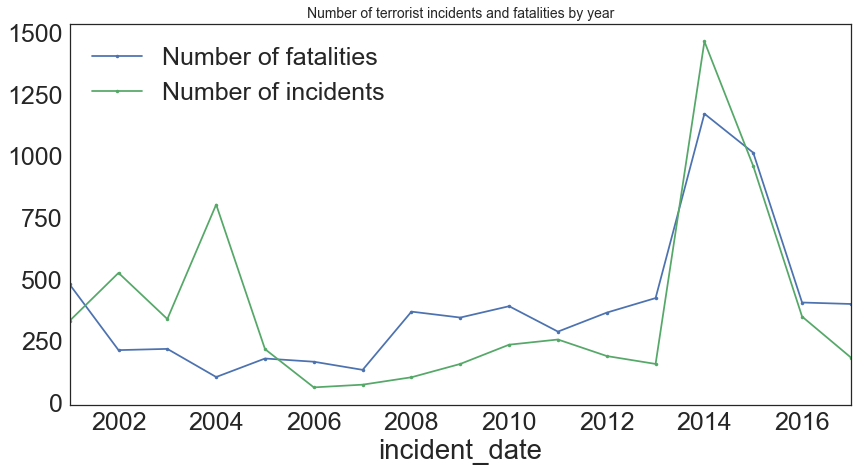

In [125]:
# show line plot of number of fatalities by year and number of terrorist incidents by year
number_of_incidents_by_year.plot(rot=0, kind='line', figsize=(15, 6), style='.-', legend=True)
number_of_fatalities_by_year = europe_21st_century.groupby([europe_21st_century['incident_date'].dt.year])['number_of_fatalities'].sum()
number_of_fatalities_by_year.plot(rot=0, kind='line', figsize=(14, 7), style='.-', legend=True)
plt.title('Number of terrorist incidents and fatalities by year', size=14)
plt.legend(['Number of fatalities', 'Number of incidents'])

**According to line chart, people could get points that the numebr of fatalities and number of incidents have the strong connection except the 2002's and 2004's data. The highest number of fatalities and incidents are in 2014 and lowest in 2006.**

#### Conclution
**In this part, people could know that fatalities is highest in summer, which is match the result that we found in part 2 that European terrorist perfer to attact in July and AUGUST. Then, the result in top 10 incidents by number of fatalities is also match the result that we find in part 1 that terrorist perfer to have a incidents in Eastern Europe. In addition, people also could find out that the number of fatalities have a vert strong connection with the number of incidents.**

####  Analyzing the Weapon Type and Method of Attack

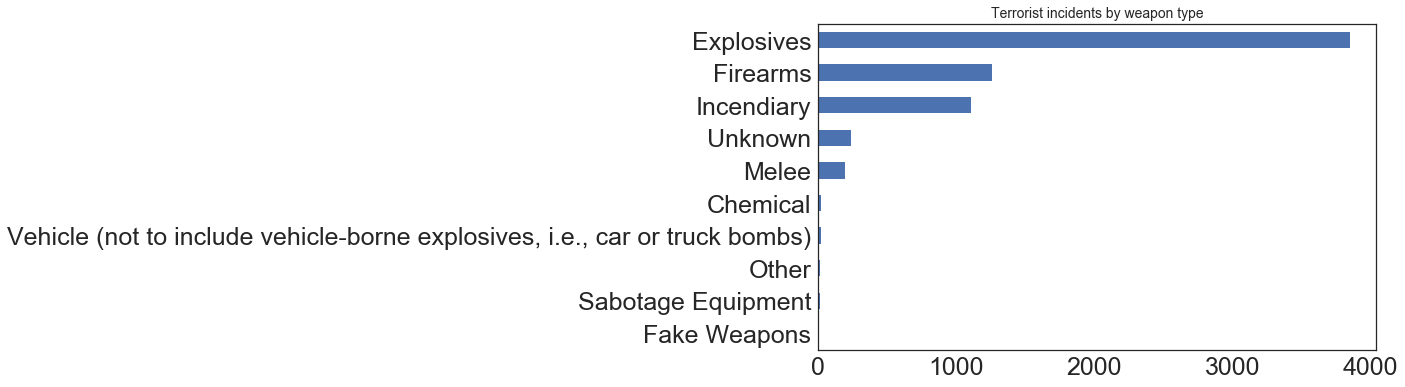

In [126]:
# incidents by weapon type and method of attack
weapon_type_count = europe_21st_century['weapon_type'].value_counts(ascending=True)
weapon_type_count.plot(kind='barh', figsize=(10, 6))
plt.title('Terrorist incidents by weapon type', size=14)

**According to the graph, the terrorist pefer to use explosives to do their terrorism incidents. The number of Explosives is higher than the sum of other weapon type. THE WHOLE GRAPH shows the up skewed.**

In [127]:
weapon_type_percentage = europe_21st_century['weapon_type'].value_counts() / europe_21st_century.shape[0] * 100
weapon_type_percentage

Explosives                                                                     57.391952
Firearms                                                                       18.748137
Incendiary                                                                     16.527571
Unknown                                                                         3.546945
Melee                                                                           2.846498
Chemical                                                                        0.312966
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)     0.253353
Other                                                                           0.193741
Sabotage Equipment                                                              0.134128
Fake Weapons                                                                    0.044709
Name: weapon_type, dtype: float64

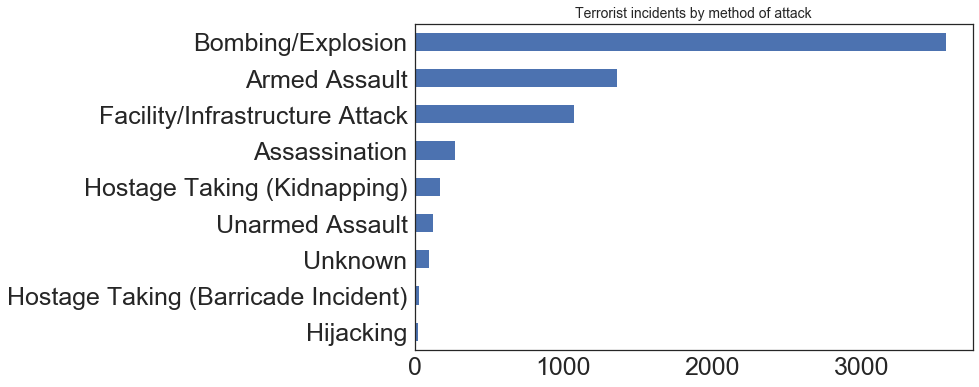

In [128]:
# terrorist incidents by method of attack
method_of_attack_count = europe_21st_century['method_of_attack'].value_counts(ascending=True)
method_of_attack_count.plot(kind='barh', figsize=(10, 6))
plt.title('Terrorist incidents by method of attack', size=14)

**According to the graph, the terrorist pefer to use explosion to finish their terrorism incidents and the following method if Armed Assaukt and infrastucture Attack. The sum number of these three method is higher than the sum of other weapon type. THE WHOLE GRAPH shows the up skewed.**

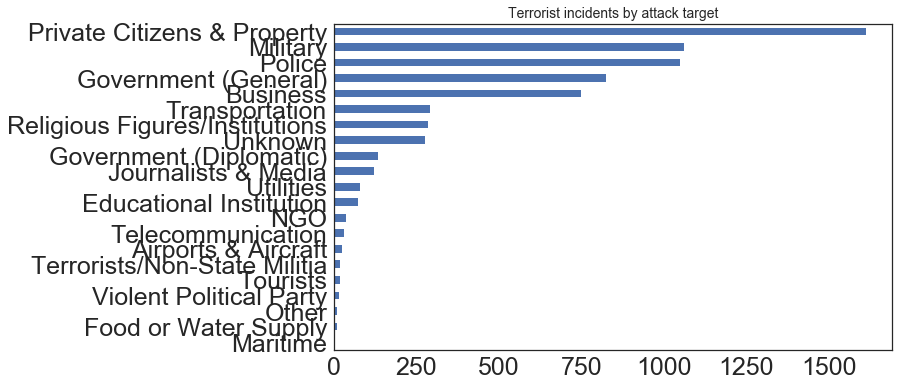

In [129]:
# terrorist incidents by attack target
attack_target_count = europe_21st_century['attack_target'].value_counts(ascending=True)
attack_target_count.plot(kind='barh', figsize=(10, 6))
plt.title('Terrorist incidents by attack target', size=14)

**Accroding to this histogram, people could understand that the top 5 of attack target are Parivate Citizens & Property, Military, Police, Government and Business. The sum of the top 5 is much higher than the sum of other target. The graph show the very clear tendency of terrorist's attack target which is the core of a coutry. The whole graph show the up skewed.**

### Conclusion:
**The biggest part of terrorism incidents in Europe in 21st Century were held in Eastern Europe, mostly in Russia and Ukraine.
Country with the highest number of terrorism incident in Eastern Europe is Russia, in Western Europe – United Kingdom.
The highest number of terrorism incidents was registered at 2014 (1172 incidents), the lowest in 2004 – 105 incidents, what means that the number of terrorism incidents has increased more than 11 times.
Only 2.30% of all incidents lasted more than 24 hours.
On summer the number of terrorist incidents and the number of fatalities are higher than on other seasons. So, we can definitely say that summer is the hottest season.
The most popular weapon types are explosives (57.39%), firearms (18.75%) and incendiary (16.53%).
The most popular methods of attack are bombing/explosion, armed assault and facility/infrastructure attack.
The most popular terrorist attack targets are Private Citizens and Property. Second most popular target is Military and Police, but on the third place - Government and Business.**

##  USA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
df = pd.read_csv("C:/Users/new/Desktop/globalterrorismdb_0718dist.csv", encoding='ISO-8859-1',
                 usecols = [0,1,2,3,7,8,11,12,13,14,18,26,27,28,29,30,31,34,35,36,37,40,41,58,81,82,83,84,97,98,101],
                low_memory = False)

df = df.rename(
    columns={'eventid':'id', 'iyear':'year', 'imonth':'month', 'iday':'day', 'country':'country_code',
             'country_txt':'country', 'provstate':'state', 'attacktype1':'attack_type_code',
             'attacktype1_txt':'attack_type', 'attacktype2':'attack_type2_code', 'attacktype2_txt':'attack_type2',
             'targtype1':'target_type_code', 'targtype1_txt':'target',
             'targsubtype1' : 'target_subtype_code', 'targsubtype1_txt' : 'target_subtype',
             'natlty1':'nationality_code', 'natlty1_txt':'nationality', 'gname':'group_name',
             'weaptype1':'weapon_code','weaptype1_txt':'weapon', 'weapsubtype1':'weapon_subtype_code',
             'weapsubtype1_txt':'weapon_subtype', 'weapdetail':'weapon_detail',
             'nkill':'fatalities','nwound':'wounded', })

In [4]:
df.shape

(181691, 31)

In [5]:
df.head()

id  year  month  day  country_code             country    state  \
0  197000000001  1970      7    2            58  Dominican Republic      NaN   
1  197000000002  1970      0    0           130              Mexico  Federal   
2  197001000001  1970      1    0           160         Philippines   Tarlac   
3  197001000002  1970      1    0            78              Greece   Attica   
4  197001000003  1970      1    0           101               Japan  Fukouka   

            city   latitude   longitude   ...    nationality_code  \
0  Santo Domingo  18.456792  -69.951164   ...                58.0   
1    Mexico city  19.371887  -99.086624   ...                21.0   
2        Unknown  15.478598  120.599741   ...               217.0   
3         Athens  37.997490   23.762728   ...               217.0   
4        Fukouka  33.580412  130.396361   ...               217.0   

          nationality                          group_name  weapon_code  \
0  Dominican Republic                              MANO-D           13   
1             Belgium  23rd of September Communist League           13   
2       United States                             Unknown           13   
3       United States                             Unknown            6   
4       United States                             Unknown            8   

       weapon  weapon_subtype_code          weapon_subtype  weapon_detail  \
0     Unknown                  NaN                     NaN            NaN   
1     Unknown                  NaN                     NaN            NaN   
2     Unknown                  NaN                     NaN            NaN   
3  Explosives                 16.0  Unknown Explosive Type      Explosive   
4  Incendiary                  NaN                     NaN     Incendiary   

  fatalities  wounded  
0        1.0      0.0  
1        0.0      0.0  
2        1.0      0.0  
3        NaN      NaN  
4        NaN      NaN  

[5 rows x 31 columns]

In [6]:
df.columns

Index(['id', 'year', 'month', 'day', 'country_code', 'country', 'state',
       'city', 'latitude', 'longitude', 'summary', 'success', 'suicide',
       'attack_type_code', 'attack_type', 'attack_type2_code', 'attack_type2',
       'target_type_code', 'target', 'target_subtype_code', 'target_subtype',
       'nationality_code', 'nationality', 'group_name', 'weapon_code',
       'weapon', 'weapon_subtype_code', 'weapon_subtype', 'weapon_detail',
       'fatalities', 'wounded'],
      dtype='object')

In [7]:
df.dtypes

id                       int64
year                     int64
month                    int64
day                      int64
country_code             int64
country                 object
state                   object
city                    object
latitude               float64
longitude              float64
summary                 object
success                  int64
suicide                  int64
attack_type_code         int64
attack_type             object
attack_type2_code      float64
attack_type2            object
target_type_code         int64
target                  object
target_subtype_code    float64
target_subtype          object
nationality_code       float64
nationality             object
group_name              object
weapon_code              int64
weapon                  object
weapon_subtype_code    float64
weapon_subtype          object
weapon_detail           object
fatalities             float64
wounded                float64
dtype: object

In [8]:
df.describe()

id           year          month            day  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

        country_code       latitude     longitude        success  \
count  181691.000000  177135.000000  1.771340e+05  181691.000000   
mean      131.968501      23.498343 -4.586957e+02       0.889598   
std       112.414535      18.569242  2.047790e+05       0.313391   
min         4.000000     -53.154613 -8.618590e+07       0.000000   
25%        78.000000      11.510046  4.545640e+00       1.000000   
50%        98.000000      31.467463  4.324651e+01       1.000000   
75%       160.000000      34.685087  6.871033e+01       1.000000   
max      1004.000000      74.633553  1.793667e+02       1.000000   

             suicide  attack_type_code  attack_type2_code  target_type_code  \
count  181691.000000     181691.000000        6314.000000     181691.000000   
mean        0.036507          3.247547           3.719512          8.439719   
std         0.187549          1.915772           2.272023          6.653838   
min         0.000000          1.000000           1.000000          1.000000   
25%         0.000000          2.000000           2.000000          3.000000   
50%         0.000000          3.000000           2.000000          4.000000   
75%         0.000000          3.000000           7.000000         14.000000   
max         1.000000          9.000000           9.000000         22.000000   

       target_subtype_code  nationality_code    weapon_code  \
count        171318.000000     180132.000000  181691.000000   
mean             46.971474        127.686441       6.447325   
std              30.953357         89.299120       2.173435   
min               1.000000          4.000000       1.000000   
25%              22.000000         83.000000       5.000000   
50%              35.000000        101.000000       6.000000   
75%              74.000000        173.000000       6.000000   
max             113.000000       1004.000000      13.000000   

       weapon_subtype_code     fatalities        wounded  
count        160923.000000  171378.000000  165380.000000  
mean             11.117162       2.403272       3.167668  
std               6.495612      11.545741      35.949392  
min               1.000000       0.000000       0.000000  
25%               5.000000       0.000000       0.000000  
50%              12.000000       0.000000       0.000000  
75%              16.000000       2.000000       2.000000  
max              31.000000    1570.000000    8191.000000

In [9]:
## Subsetting only US data
df = df[df.country == 'United States']
df.country = df.country.astype('category')
country_list = df.country.cat.categories.tolist()
len(country_list)

1

In [10]:
## Checking for NAs
nnull = df.isnull()
nnull.sum()

id                        0
year                      0
month                     0
day                       0
country_code              0
country                   0
state                     4
city                      0
latitude                  1
longitude                 1
summary                1053
success                   0
suicide                   0
attack_type_code          0
attack_type               0
attack_type2_code      2785
attack_type2           2785
target_type_code          0
target                    0
target_subtype_code     120
target_subtype          120
nationality_code          9
nationality               9
group_name                0
weapon_code               0
weapon                    0
weapon_subtype_code     259
weapon_subtype          259
weapon_detail           544
fatalities               73
wounded                  93
dtype: int64

In [11]:
## Imputing NAs
#States
df[df.state.isnull()]
df.loc[df['id'] == 199512080005,'state'] = 'New York'
df.loc[df['id'] == 197209280011,'state'] = 'District of Columbia'
df.loc[df['id'] == 201701070015,'state'] = 'Texas'
df.loc[df['id'] == 201702060025,'state'] = 'New Hampshire'

#Longitude, latitude (among other missing values) - 1 affected row
df[df.longitude.isnull()]
df = df.loc[df['id'] != 197601010002] #removing the affected row due to limited data

#Summary
df.summary = df.summary.fillna('No Summary').astype(object)

#Attack type 2 - based on unknown values in existing records
df.attack_type2_code = df.attack_type2_code.fillna(9).astype(int)
df.attack_type2 = df.attack_type2.fillna('Unknown').astype(object)

#Target subtype - based on unknown values in existing records
df.target_subtype_code = df.target_subtype_code.fillna(20).astype(int)
df.target_subtype = df.target_subtype.fillna('Unknown').astype(object)

#Weapon subtype and detail - based on unknown values in existing records
df.weapon_subtype_code = df.weapon_subtype_code.fillna(13).astype(int)
df.weapon_subtype = df.weapon_subtype.fillna('Unknown').astype(object)
df.weapon_detail = df.weapon_detail.fillna('Unknown').astype(object)

#Nationality - creating an "Unknown" value
df.nationality_code = df.nationality_code.fillna(0).astype(int)
df.nationality = df.nationality.fillna('Unknown').astype(object)

#Fatalities
df.fatalities = df.fatalities.fillna(0).astype(int)

#Wounded
df.wounded = df.wounded.fillna(0).astype(int)

In [12]:
## Checking for NAs
nnull = df.isnull()
nnull.sum()

id                     0
year                   0
month                  0
day                    0
country_code           0
country                0
state                  0
city                   0
latitude               0
longitude              0
summary                0
success                0
suicide                0
attack_type_code       0
attack_type            0
attack_type2_code      0
attack_type2           0
target_type_code       0
target                 0
target_subtype_code    0
target_subtype         0
nationality_code       0
nationality            0
group_name             0
weapon_code            0
weapon                 0
weapon_subtype_code    0
weapon_subtype         0
weapon_detail          0
fatalities             0
wounded                0
dtype: int64

###  Cleaning data 

In [13]:
#adjusting data types
for col in ['country','state','city','success','suicide','attack_type','attack_type2','target','target_subtype','nationality','group_name','weapon','weapon_subtype','weapon_detail']:
    df[col] = df[col].astype('category')
    
for col in ['attack_type2_code','target_subtype_code', 'nationality_code', 'weapon_subtype_code']:
    df[col] = df[col].astype('int')

In [14]:
df.dtypes

id                        int64
year                      int64
month                     int64
day                       int64
country_code              int64
country                category
state                  category
city                   category
latitude                float64
longitude               float64
summary                  object
success                category
suicide                category
attack_type_code          int64
attack_type            category
attack_type2_code         int32
attack_type2           category
target_type_code          int64
target                 category
target_subtype_code       int32
target_subtype         category
nationality_code          int32
nationality            category
group_name             category
weapon_code               int64
weapon                 category
weapon_subtype_code       int32
weapon_subtype         category
weapon_detail          category
fatalities                int32
wounded                   int32
dtype: o

In [15]:
## Replacing ambigious values in the day column
df.loc[df['day'] == 0,'day'] = 1

In [16]:
## Combining date columns into one
df['date'] = pd.to_datetime(df[['day', 'month', 'year']])
df.drop(['day','month'], axis=1, inplace=True)  

In [17]:
## Checking for duplicates
df = df.sort_values(['fatalities', 'wounded'], ascending = False)

## Removing duplicates
df = df.drop_duplicates(['latitude', 'longitude', 'fatalities', 'date'])

In [18]:
df.shape

(2490, 30)

###  Exploratore data analysis

In [19]:
grouped_year_id = pd.DataFrame(df,columns = ['year','id'])
grouped_year_id = grouped_year_id.groupby(['year']).count()
grouped_year_id = grouped_year_id.rename(columns = {'id':'number_of_attacks'})
grouped_year_id

number_of_attacks
year                   
1970                400
1971                213
1972                 53
1973                 54
1974                 78
1975                118
1976                 73
1977                106
1978                 70
1979                 61
1980                 65
1981                 63
1982                 61
1983                 41
1984                 60
1985                 36
1986                 45
1987                 31
1988                 24
1989                 39
1990                 32
1991                 29
1992                 31
1994                 52
1995                 55
1996                 31
1997                 37
1998                 26
1999                 53
2000                 30
2001                 41
2002                 31
2003                 29
2004                  9
2005                 19
2006                  6
2007                  8
2008                 15
2009                 11
2010                 16
2011                 10
2012                 17
2013                 19
2014                 28
2015                 38
2016                 61
2017                 65

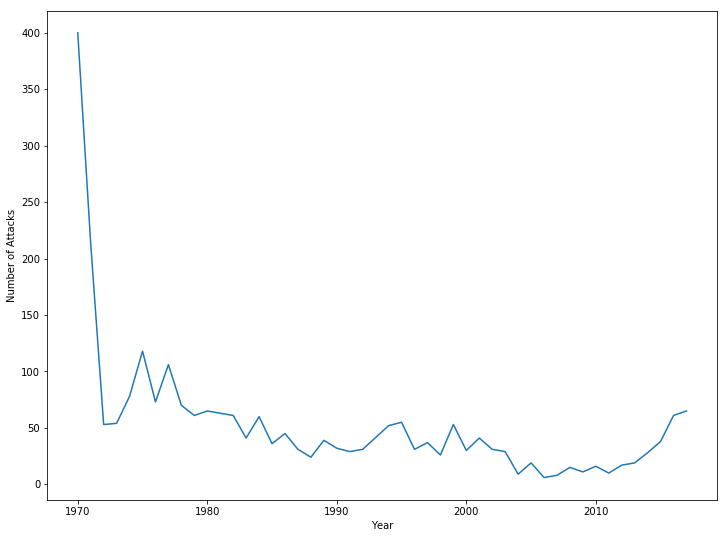

In [20]:
plt.figure(figsize=(12, 9))
plt.plot(grouped_year_id)
plt.ylabel('Number of Attacks')
plt.xlabel('Year')

**From the line chart we can see that the number of terrorist attack in US varies greatly each year. in 1970 US has the highest number of terrorist attack of 400**

###  Number of total victims

In [21]:
grouped_year_victims = pd.DataFrame(df,columns = ['year','fatalities','wounded'])
grouped_year_victims['victims'] = df.fatalities + df.wounded
grouped_year_victims = grouped_year_victims.groupby(['year']).sum()
grouped_year_victims

fatalities  wounded  victims
year                              
1970          33      152      185
1971          20       55       75
1972           9       29       38
1973          44       33       77
1974          13       54       67
1975          24      158      182
1976           3       37       40
1977           4       16       20
1978           8        8       16
1979          18       58       76
1980          15       22       37
1981           8       15       23
1982          11       34       45
1983           8        5       13
1984           3      780      783
1985           3       13       16
1986           1       36       37
1987           1        1        2
1988           1        1        2
1989           3       14       17
1990           5        7       12
1991           2        4        6
1992           2        3        5
1994           9       13       22
1995         178      738      916
1996           2      119      121
1997           2       18       20
1998           4        3        7
1999          20       40       60
2000           0        7        7
2001        3008    16515    19523
2002           4       11       15
2003           0        0        0
2004           0        0        0
2005           0        0        0
2006           1       14       15
2007           0        0        0
2008           2       12       14
2009          18       41       59
2010           4       17       21
2011           0        2        2
2012           7        7       14
2013          23      436      459
2014          26       19       45
2015          54       58      112
2016          68      139      207
2017          95      932     1027

** A list of data is difficult to analyse, therefore lets make it into a line chart.**

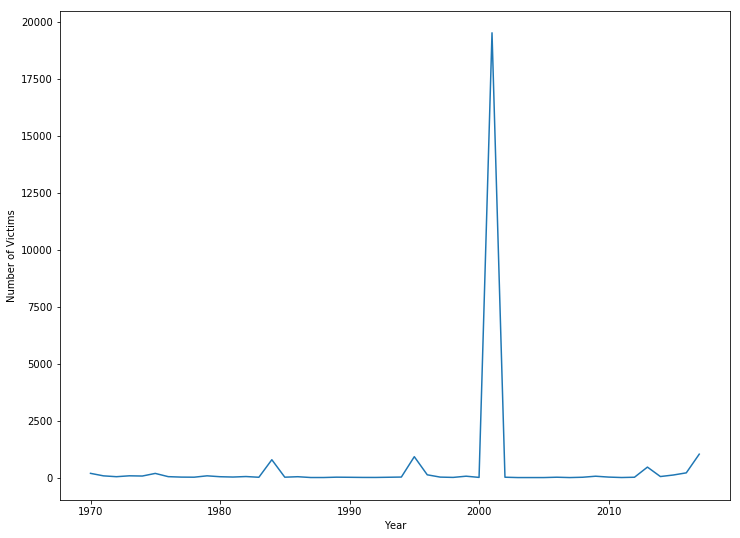

In [22]:
plt.figure(figsize=(12, 9))
plt.plot(grouped_year_victims.victims)
plt.ylabel('Number of Victims')
plt.xlabel('Year')

**This line chart shows the total victim each year. 2001 has a highest amount of victims due to terrorist attack in USA.**

###  Number of fatalities and number of wounded over time

In [23]:
df_victims = pd.DataFrame(grouped_year_victims, columns = ['fatalities','wounded','victims'])

In [24]:
df_victims = df_victims.reset_index()
df_victims['year'] = (list(range(1970,1993)) + list(range(1994,2018)))

In [25]:
df_victims

year  fatalities  wounded  victims
0   1970          33      152      185
1   1971          20       55       75
2   1972           9       29       38
3   1973          44       33       77
4   1974          13       54       67
5   1975          24      158      182
6   1976           3       37       40
7   1977           4       16       20
8   1978           8        8       16
9   1979          18       58       76
10  1980          15       22       37
11  1981           8       15       23
12  1982          11       34       45
13  1983           8        5       13
14  1984           3      780      783
15  1985           3       13       16
16  1986           1       36       37
17  1987           1        1        2
18  1988           1        1        2
19  1989           3       14       17
20  1990           5        7       12
21  1991           2        4        6
22  1992           2        3        5
23  1994           9       13       22
24  1995         178      738      916
25  1996           2      119      121
26  1997           2       18       20
27  1998           4        3        7
28  1999          20       40       60
29  2000           0        7        7
30  2001        3008    16515    19523
31  2002           4       11       15
32  2003           0        0        0
33  2004           0        0        0
34  2005           0        0        0
35  2006           1       14       15
36  2007           0        0        0
37  2008           2       12       14
38  2009          18       41       59
39  2010           4       17       21
40  2011           0        2        2
41  2012           7        7       14
42  2013          23      436      459
43  2014          26       19       45
44  2015          54       58      112
45  2016          68      139      207
46  2017          95      932     1027

**Victims are specified into two categories of fatalities and wounded. It is transformed into a line chart below.**

In [26]:
year = df_victims.year
all_victims = df_victims.victims
fatalities = df_victims.fatalities
wounded = df_victims.wounded

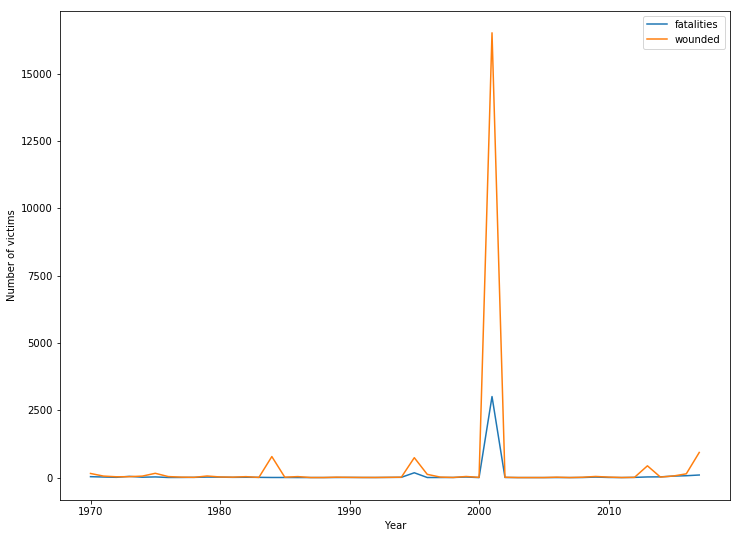

In [27]:
plt.figure(figsize=(12, 9))
plt.plot(year, fatalities)
plt.plot(year, wounded)
plt.legend()
plt.ylabel('Number of victims')
plt.xlabel('Year')

This line chart shows the fatalities and wounded of victims seperately. From the chart we can see that it is still 2001 that has the highest number of fatalities and wounded due to terrorist attack.

###  Analysis of attack types

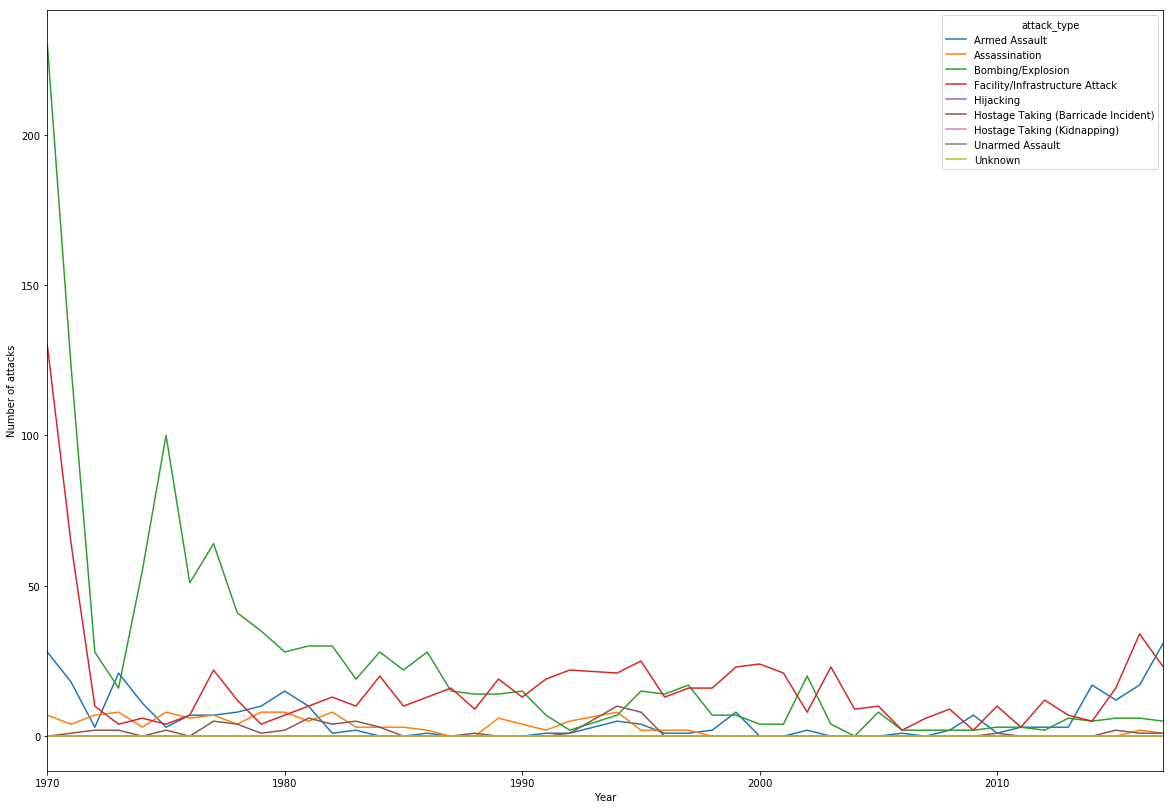

In [28]:
top_5_attack_types=df[df['attack_type'].isin(df['attack_type'].value_counts()[0:5].index)]
pd.crosstab(top_5_attack_types.year,top_5_attack_types.attack_type).plot()
fig=plt.gcf()
fig.set_size_inches(20,14)
#plt.box(on=None)
plt.ylabel('Number of attacks')
plt.xlabel('Year')
plt.show()

**This line chart shows the attack types of the overall attack each year. Attack types are splitted into 5 categories. We can tell that Bombing/explsion has the highest rate since 1970 and is gradually decreasing. Facility/infrastrecture attack has gradually incrased since 1985, and armed assaut is also increasing since 2010. However, the overall number of terrorist attack has decreased greatly over the year.**

###  Top 10 perpetrator grouops

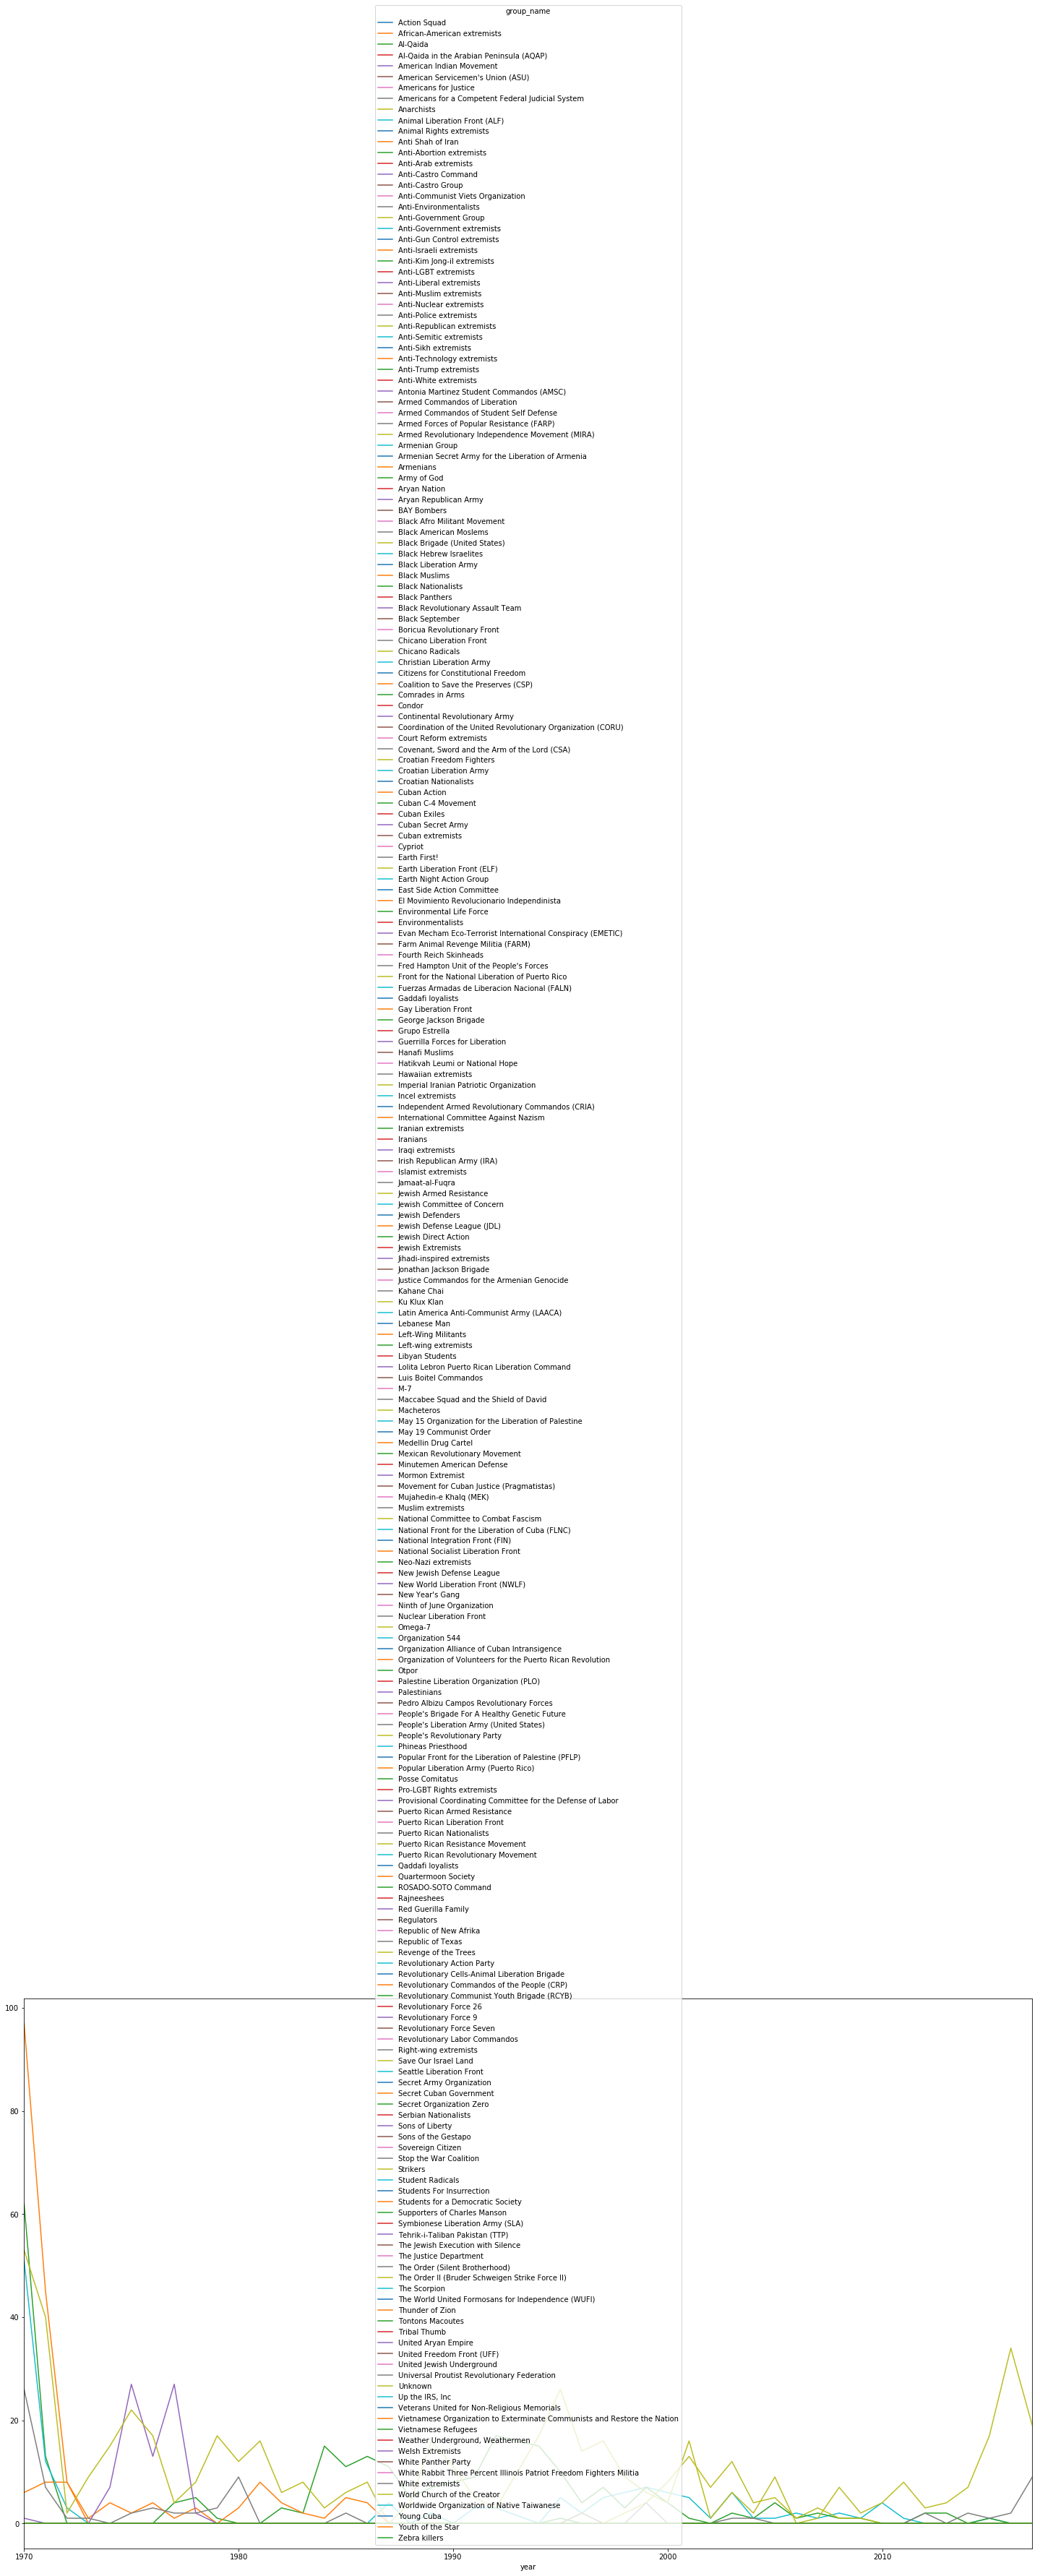

In [130]:
top_10_groups=df[df['group_name'].isin(df['group_name'].value_counts()[0:10].index)]
pd.crosstab(top_10_groups.year,top_10_groups.group_name).plot()
fig=plt.gcf()
fig.set_size_inches(25,14)
plt.show()

**This line chart showed the number of terrorist attacks each group has created in USA over the year. This chart showed the rate of terrorist attacks created by 10 different groups.**

###  Number of victims for armed assault and facility/infrastructure attacks over time

In [42]:
df2 = df[df.attack_type.isin(['Armed Assault','Facility/Infrastructure Attack'])]

In [43]:
grouped_year_victims2 = pd.DataFrame(df2,columns = ['year','fatalities','wounded'])
grouped_year_victims2['victims'] = df2.fatalities + df2.wounded
grouped_year_victims2.drop(['fatalities', 'wounded'], axis=1, inplace=True)
grouped_year_victims2 = grouped_year_victims2.groupby(['year']).sum()
grouped_year_victims2

victims
year         
1970       57
1971       50
1972       15
1973       53
1974       14
1975        4
1976        3
1977        5
1978        6
1979       43
1980       17
1981        5
1982        9
1983        8
1984        1
1985        3
1986        0
1987        1
1988        0
1989        1
1990        0
1991        4
1992        2
1994       11
1995       83
1996        0
1997        8
1998        4
1999       20
2000        0
2001        0
2002        7
2003        0
2004        0
2005        0
2006        6
2007        0
2008       13
2009       57
2010       20
2011        2
2012       13
2013      174
2014       42
2015       48
2016       73
2017      964

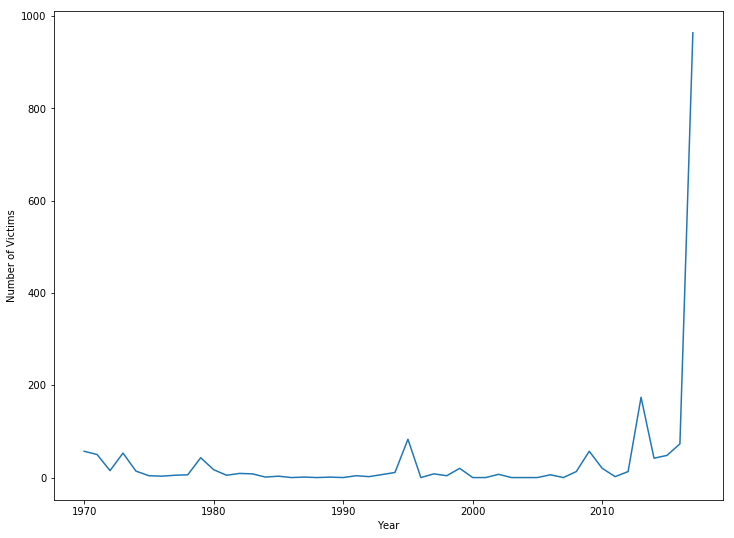

In [44]:
plt.figure(figsize=(12, 9))
plt.plot(grouped_year_victims2)
plt.ylabel('Number of Victims')
plt.xlabel('Year')

** This line chart showed the number of terrorist attacks each group has created in USA over the year. This chart showed the rate of terrorist attacks created by 10 different groups.**

###  Top 10 perpetrator groups for armed assault and facility attacks

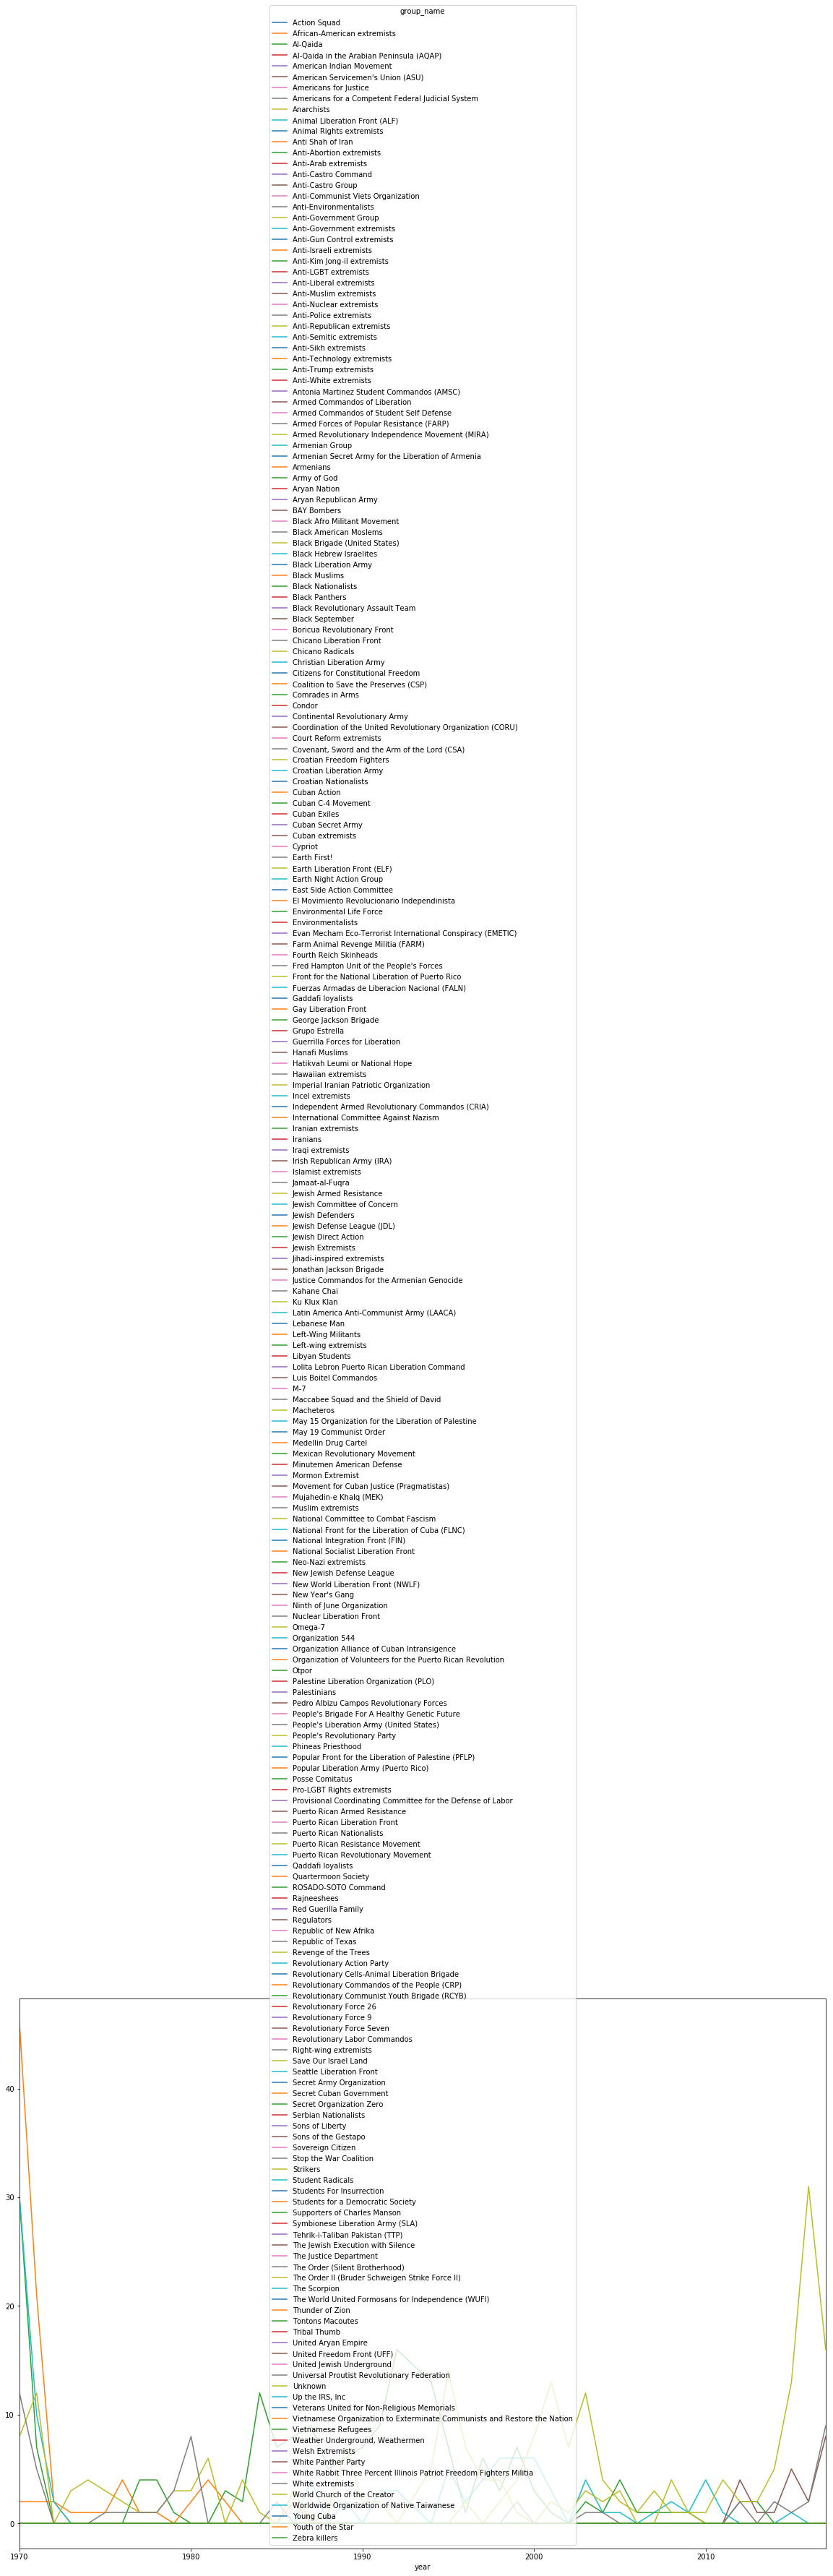

In [129]:
top_10_groups2=df2[df2['group_name'].isin(df2['group_name'].value_counts()[0:10].index)]
pd.crosstab(top_10_groups2.year,top_10_groups2.group_name).plot()
fig=plt.gcf()
fig.set_size_inches(20,14)
plt.show()

** This line chart showed the top 10 different perpaqtrator groups that are responsible for armed assualt and facility/infrastructure attack over the years. **

### Top target groups before and after 9/11

** This is to show the targeted group of victims from the terrorist group before and after the 9/11 attack. we cfan see that Religious Figures/Institution has became the most targeted group after 9/11.**

In [46]:
df2_before = df2[df2.date < '2001-09-11']
df2_after = df2[df2.date > '2001-09-11']
df2_before['target'].value_counts(normalize=True)[0:10] * 100

Business                          22.265625
Abortion Related                  20.833333
Private Citizens & Property       11.067708
Government (General)               8.723958
Police                             7.421875
Military                           7.031250
Educational Institution            7.031250
Government (Diplomatic)            4.036458
Religious Figures/Institutions     3.515625
Journalists & Media                2.213542
Name: target, dtype: float64

In [47]:
df2_after['target'].value_counts(normalize=True)[0:10] * 100

Religious Figures/Institutions    24.199288
Private Citizens & Property       19.928826
Business                          18.861210
Abortion Related                   7.473310
Police                             7.473310
Government (General)               6.049822
Educational Institution            5.338078
Military                           3.914591
Utilities                          2.491103
Airports & Aircraft                1.423488
Name: target, dtype: float64

In [48]:
total_religious_attacks = df2_after.id[df2_after['target'] == 'Religious Figures/Institutions'].count()
total_attacks = df2_after.id.count()

In [49]:
religious_attacks_after = total_religious_attacks / total_attacks * 100
religious_attacks_after

24.199288256227756

In [50]:
total_religious_attacks_before = df2_before.id[df2_before['target'] == 'Religious Figures/Institutions'].count()
total_attacks_before = df2_before.id.count()

In [51]:
religious_attacks_before = total_religious_attacks_before / total_attacks_before * 100
religious_attacks_before

3.515625

In [52]:
religious_attacks_increase = (religious_attacks_after - religious_attacks_before) / religious_attacks_before *100
religious_attacks_increase

588.33531039936724

####  Detailed analysis of attacks (armed assault, facility attacks) for religious motives
**before 9/11**

In [53]:
#used below to manually see which summaries have 'christian|church' as the victim
christian_before_list = df2_before.summary.str.contains('christian|church',case= False)
christian_before_list.sum()
df2_before[christian_before_list]
#[0,1,4,5,6,8,9,10,11,12,20,22,23] need to be removed from target list
#[1,6,8,10,11,12,22,23] are perpetrators associated with "church", specifically Christian Identity Church or World Church of the creator

christian_before_target = christian_before_list.sum()
christian_before_target -= 13
christian_before_target

christian_before_perp = 8
christian_before_perp

8

In [54]:
#used below to manually see which summaries have 'jewish|synagogue|jew' as the victim
judaism_before_list = df2_before.summary.str.contains('jewish|synagogue|jew',case= False)
judaism_before_list.sum()
#df2_before[judaism_before_list].iloc[23].summary
#[0,8,9,10,11,12,13,14,15,16,17,18,19,20,22] need to be removed from target list
#[8,9,10,11,12,13,14,15,16,17,18,19,20,22] are perpetrators associated with "jewish", many from Jewish Defense League

judaism_before_target = judaism_before_list.sum()
judaism_before_target -= 15
judaism_before_target

judaism_before_perp = 14
judaism_before_perp

14

In [55]:
#used below to manually see which summaries have 'muslim|islam|mosque|arab' as the victim
islam_before_list = df2_before.summary.str.contains('muslim|islam|mosque|arab',case= False)
islam_before_list.sum()
#df2_before[islam_before_list].iloc[19].summary
#[2:9,11:14,18] need to be removed from target list
#[2:9,11:14] are perpetrators associated with 'muslim|islam|mosque|arab'

islam_before_target = islam_before_list.sum()
islam_before_target -= 13
islam_before_target

islam_before_perp = 12
islam_before_perp

12

In [56]:
#used below to manually see which summaries have 'hare krishna|hindu|hindi|buddhist|buddhism' as the victim
hindu_before_list = df2_before.summary.str.contains('hare krishna|hindu|hindi|buddhist|buddhism',case= False)
hindu_before_list.sum()
#df2_before[hindu_before_list].iloc[1].summary
#none have to be removed

hindu_before_target = hindu_before_list.sum()
hindu_before_target

2

In [57]:
#the result is 0, so do not need to review summaries
sikh_before = df2_before.summary.str.contains('sikh',case= False).sum()

#### Percentage Calculations of all Armed Assults and Facility Attacks Before 9/11:

In [58]:
total_before = len(df2_before)

In [59]:
christian_before_target_percentage = christian_before_target / total_before * 100
christian_before_target_percentage

1.6927083333333333

In [60]:
christian_before_perp_percentage = christian_before_perp / total_before * 100
christian_before_perp_percentage

1.0416666666666665

In [61]:
judaism_before_target_percentage = judaism_before_target / total_before * 100
judaism_before_target_percentage

1.5625

In [62]:
judaism_before_perp_percentage = judaism_before_perp / total_before * 100
judaism_before_perp_percentage

1.8229166666666667

In [63]:
islam_before_target_percentage = islam_before_target / total_before * 100
islam_before_target_percentage

0.91145833333333337

In [64]:
islam_before_perp_percentage = islam_before_perp / total_before * 100
islam_before_perp_percentage

1.5625

In [65]:
hindu_before_target_percentage = hindu_before_target / total_before * 100
hindu_before_target_percentage

0.26041666666666663

**After 9/11**

In [66]:
#used below to manually see which summaries have 'christian|church' as the victim
christian_after_list = df2_after.summary.str.contains('christian|church',case= False)
christian_after_list.sum()
#df2_after[christian_after_list].iloc[34].summary
#[2,14] needs to be removed from target list
#none with words 'christian|church' related to perpetrators

christian_after_target = christian_after_list.sum()
christian_after_target -= 2
christian_after_target

33

In [67]:
#used below to manually see which summaries have 'jewish|synagogue|jew' as the victim
judaism_after_list = df2_after.summary.str.contains('jewish|synagogue|jew',case= False)
judaism_after_list.sum()
#none need to be removed from target list 
#none with words'jewish|synagogue|jew' related to perpetrators

judaism_after_target = judaism_after_list.sum()
judaism_after_target

7

In [68]:
#used below to manually see which summaries have 'muslim|islam|mosque|arab' as the victim
islam_after_list = df2_after.summary.str.contains('muslim|islam|mosque|arab|muhammad|mohammad',case= False)
islam_after_list.sum()
df2_after[islam_after_list].iloc[52].summary
#[0:2,4,5,7:19,12,21,23,25,33] need to be removed from target
#[0,2,4,5,8,9,10,12,13,16,17,19,21,25] are perpetrators associated with 'muslim|islam|mosque|arab'

islam_after_target = islam_after_list.sum()
islam_after_target -= 22
islam_after_target

islam_after_perp = 14
islam_after_perp

14

In [69]:
#used below to manually see which summaries have 'hare krishna|hindu|hindi|buddhist|buddhism' as the victim
hindu_after_list = df2_after.summary.str.contains('hare krishna|hindu|hindi|buddhist|buddhism',case= False)
hindu_after_list.sum()
#df2_after[hindu_after_list].iloc[0].summary
#all need to be kept for target list

hindu_after_target = hindu_after_list.sum()
hindu_after_target

1

In [70]:
#used below to manually see which summaries have 'sikh' as the victim
sikh_after_list = df2_after.summary.str.contains('sikh',case= False)
sikh_after_list.sum()
df2_after[sikh_after_list].iloc[1].summary
#all need to be kept for target list

sikh_after_target = sikh_after_list.sum()
sikh_after_target

2

####  Percentage of Total Armed Assults and Facility Attacks After 9/11:

In [71]:
total_after = len(df2_after)

In [72]:
christian_after_target_percentage = christian_after_target / total_after * 100
christian_after_target_percentage

11.743772241992882

In [73]:
judaism_after_target_percentage = judaism_after_target / total_after * 100
judaism_after_target_percentage

2.4911032028469751

In [74]:
islam_after_target_percentage = islam_after_target / total_after * 100
islam_after_target_percentage

11.032028469750891

In [75]:
islam_after_perp_percentage = islam_after_perp / total_after * 100
islam_after_perp_percentage

4.98220640569395

In [76]:
sikh_after_target_percentage = sikh_after_target / total_after * 100
sikh_after_target_percentage

0.71174377224199281

In [77]:
christian_target_percent_change = (christian_after_target_percentage - christian_before_target_percentage) / christian_before_target_percentage * 100
christian_target_percent_change

593.78592937311794

In [78]:
christian_perp_percent_change = (0 - christian_before_perp_percentage ) / christian_before_perp_percentage *100
christian_perp_percent_change

-100.0

In [79]:
judaism_target_percent_change = (judaism_after_target_percentage - judaism_before_target_percentage) / judaism_before_target_percentage * 100
judaism_target_percent_change

59.430604982206404

In [80]:
judaism_perp_percent_change = (0 - judaism_before_perp_percentage)/judaism_before_perp_percentage * 100
judaism_perp_percent_change

-100.0

In [81]:
islam_target_percent_change = (islam_after_target_percentage - islam_before_target_percentage) / islam_before_target_percentage * 100
islam_target_percent_change

1110.3711235383835

In [82]:
islam_perp_percent_change = (islam_after_perp_percentage - islam_before_perp_percentage) / islam_before_perp_percentage * 100
islam_perp_percent_change

218.8612099644128

#### Detailed analysis of attacks (armed assault, facility attacks) for racial motives
**Before 9/11**

In [83]:
white_before_list = df2_before.summary.str.contains('white|Ku Klux Klan|KKK|white american|neo-nazi|nazi|fascist',case= False)
white_before_list.sum()

#manually went through each summary to determine whether the perpetrator or the victim was associated with the race "white"
#df2_before[white_before_list].iloc[66].summary
white_before_target = white_before_list.sum()
white_before_target -= 42
white_before_target

white_before_perp = 42+1
white_before_perp

43

In [84]:
arabic_before_list = df2_before.summary.str.contains('arab|islamic|islamic state|iran|iraq|afghanistan|islamophobic|iraqi|arabic',case= False)
arabic_before_list.sum() #8
#[0,1,2,3,5,7] - target
#[] - perpetrator
#[4,6] - not related

#df2_before[arabic_before_list]

arabic_before_target = arabic_before_list.sum()
arabic_before_target -= 6
arabic_before_target

arabic_before_perp = 0
arabic_before_perp

0

In [85]:
nativeamerican_before_list = df2_before.summary.str.contains('native american|dakota',case= False)
nativeamerican_before_list.sum() #7
#[0,] - target
#[] - perpetrator
#[1,2,3,4,5,6] - not related

#df2_before[nativeamerican_before_list]

nativeamerican_before_target = nativeamerican_before_list.sum()
nativeamerican_before_target -= 1
nativeamerican_before_target

nativeamerican_before_perp = 0
nativeamerican_before_perp

0

In [86]:
asian_before_list = df2_before.summary.str.contains('asia|chinese|vietnam',case= False)
asian_before_list.sum()
#manually went through each summary to determine whether the perpetrator or the victim was associated with the race "white"
#some observations had both targets and perpetrators of the same race
#df2_before[asian_before_list]
asian_before_target = asian_before_list.sum()
asian_before_target

asian_before_perp = 2
asian_before_perp

2

In [87]:
black_before_list = df2_before.summary.str.contains('black|african american|african-american',case= False)
black_before_list.sum()
#df2_before[black_before_list].iloc[90].summary
#[0,1,3:5,8:20,23:32,45:50,52:54,57,65:71,77,78,86,87] need to be removed from the target list
#[0,1,3:5,10:19,23:32,45:50,52:54,57,65:71,77,78,86,87] are perpetrators associated with 'black|african american|african-american'

black_before_target = black_before_list.sum()
black_before_target -= 49
black_before_target

black_before_perp = 46
black_before_perp

46

In [88]:
latin_before_list = df2_before.summary.str.contains('latina|latino|latin|hispanic|mexican|mexico|cuba|puerto rico|puerto rican|venezuela',case= False)
latin_before_list.sum()
#df2_before[latin_before_list].iloc[26].summary
#[0:10,12,13,15:20,22:26] need to be removed from target list
#0,2:5,7, 8,10,12,16,18:20,22] are perpetrators associated with 'latina|latino|latin|hispanic|mexican|mexico|cuba|puerto rico|puerto rican'

latin_before_target = latin_before_list.sum()
latin_before_target -= 24
latin_before_target

latin_before_perp = 14
latin_before_perp

14

####  Percentage Calculations of all Armed Assults and Facility Attacks Before 9/11:

In [89]:
white_before_target_percentage = white_before_target / total_before * 100
white_before_target_percentage

3.125

In [90]:
white_before_perp_percentage = white_before_perp / total_before * 100
white_before_perp_percentage

5.598958333333334

In [91]:
arabic_before_target_percentage = arabic_before_target/total_before *100
arabic_before_target_percentage

0.26041666666666663

In [92]:
arabic_before_perp_percentage = arabic_before_perp/total_before *100
arabic_before_perp_percentage

0.0

In [93]:
nativeamerican_before_target_percentage = nativeamerican_before_target/total_before *100
nativeamerican_before_target_percentage

0.78125

In [94]:
nativeamerican_before_perp_percentage = nativeamerican_before_perp/total_before *100
nativeamerican_before_perp_percentage

0.0

In [95]:
asian_before_target_percentage = asian_before_target/total_before *100
asian_before_target_percentage

1.171875

In [96]:
asian_before_perp_percentage = asian_before_perp/total_before *100
asian_before_perp_percentage

0.26041666666666663

In [97]:
black_before_target_percentage = black_before_target / total_before *100
black_before_target_percentage

5.46875

In [98]:
black_before_perp_percentage = black_before_perp / total_before *100
black_before_perp_percentage

5.989583333333334

In [99]:
latin_before_target_percentage = latin_before_target / total_before * 100
latin_before_target_percentage

0.390625

In [100]:
latin_before_perp_percentage = latin_before_perp / total_before * 100
latin_before_perp_percentage

1.8229166666666667

** After 9/11**

In [101]:
white_after_list = df2_after.summary.str.contains('white|Ku Klux Klan|KKK|white american|neo-nazi|nazi|fascist',case= False)
white_after_list.sum()

#manually went through each summary to determine whether the perpetrator or the victim was associated with the race "white"
white_after_target = white_after_list.sum()
white_after_target -= 22
white_after_target

white_after_perp = 22+1
white_after_perp

23

In [102]:
arabic_after_list = df2_after.summary.str.contains('arab|islamic state|islamic|iran|iraq|afghanistan|islamophobic|iraqi|arabic',case= False)
arabic_after_list.sum() #32
#[2,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31] - target 19
#[0,3,4,5,6,7,8,9,10,11,16] - perpetrator 11
#[1,12] - not related

#df2_after[arabic_after_list]
arabic_after_target = arabic_after_list.sum()
arabic_after_target -= 19
arabic_after_target

arabic_after_perp = 11
arabic_after_perp

11

In [103]:
nativeamerican_after_list = df2_after.summary.str.contains('native american|dakota',case= False)
nativeamerican_after_list.sum() #7
#[1,2,3,4,5] - target 5
#[] - perpetrator 0
#[0,6] - not related 2
#df2_after[nativeamerican_after_list]
nativeamerican_after_target = nativeamerican_after_list.sum()
nativeamerican_after_target -= 5
nativeamerican_after_target

nativeamerican_after_perp = 0
nativeamerican_after_perp

0

In [104]:
asian_after_list = df2_after.summary.str.contains('asia|chinese|vietnam',case= False)
asian_after_list.sum()
#manually went through each summary to determine whether the perpetrator or the victim was associated with the race "white"
#some observations had both targets and perpetrators of the same race
#df2_after[asian_after_list].iloc[0].summary

asian_after_target = asian_after_list.sum()
asian_after_target

asian_after_perp = 0
asian_after_perp

0

In [105]:
black_after_list = df2_after.summary.str.contains('black|african american|african-american',case= False)
black_after_list.sum()
df2_after[black_after_list].iloc[19].summary
#[1,7:8,11:14,16,17] need to be removed from the target list
#[1, 11:14, 16] are perpetrators associated with 'black|african american|african-american'

black_after_target = black_after_list.sum()
black_after_target -= 9
black_after_target

black_after_perp = 6
black_after_perp

6

In [106]:
latin_after_list = df2_after.summary.str.contains('latina|latino|latin|hispanic|mexican|mexico|cuba|puerto rico|puerto rican|venezuela',case= False)
latin_after_list.sum()
df2_after[latin_after_list].iloc[9].summary
#[0:1,5:9] need to be removed from the target list
#[5] is a perpetrator associated with 'latina|latino|latin|hispanic|mexican|mexico|cuba|puerto rico|puerto rican|venezuela'

latin_after_target = latin_after_list.sum()
latin_after_target -= 7
latin_after_target

latin_after_perp = 1
latin_after_perp

1

####  Percentage Calculations of all Armed Assults and Facility Attacks After 9/11:

In [107]:
white_after_target_percentage = white_after_target / total_after * 100
white_after_target_percentage

4.9822064056939501

In [108]:
white_after_perp_percentage = white_after_perp / total_after * 100
white_after_perp_percentage

8.185053380782918

In [109]:
arabic_after_target_percentage = arabic_after_target/total_after *100
arabic_after_target_percentage

4.6263345195729535

In [110]:
arabic_after_perp_percentage = arabic_after_perp/total_after *100
arabic_after_perp_percentage

3.9145907473309607

In [111]:
nativeamerican_after_target_percentage = nativeamerican_after_target/total_after *100
nativeamerican_after_target_percentage

0.71174377224199281

In [112]:
nativeamerican_after_perp_percentage = nativeamerican_after_perp/total_after *100
nativeamerican_after_perp_percentage

0.0

In [113]:
asian_after_target_percentage = asian_after_target/total_after *100
asian_after_target_percentage

0.35587188612099641

In [114]:
asian_after_perp_percentage = asian_after_perp/total_after *100
asian_after_perp_percentage

0.0

In [115]:
black_after_target_percentage = black_after_target / total_after * 100
black_after_target_percentage

3.9145907473309607

In [116]:
black_after_perp_percentage = black_after_perp / total_after * 100
black_after_perp_percentage

2.135231316725979

In [117]:
latin_after_target_percentage = latin_before_target / total_after * 100
latin_after_target_percentage

1.0676156583629894

In [118]:
latin_after_perp_percentage = latin_after_perp / total_after * 100
latin_after_perp_percentage

0.3558718861209964

####  Percentage Changes Before and After 9/11

In [119]:
white_target_percent_change = (white_after_target_percentage - white_before_target_percentage) / white_before_target_percentage * 100
white_target_percent_change

59.430604982206404

In [120]:
white_perp_percent_change = (white_after_perp_percentage - white_before_perp_percentage) / white_before_perp_percentage * 100
white_perp_percent_change

46.18886038235536

In [121]:
arabic_target_percent_change = (arabic_after_target_percentage-arabic_before_target_percentage)/arabic_before_target_percentage *100
arabic_target_percent_change

1676.5124555160141

In [122]:
nativeamerican_target_percent_change = (nativeamerican_after_target_percentage-nativeamerican_before_target_percentage)/nativeamerican_before_target_percentage *100
nativeamerican_target_percent_change

-8.8967971530249201

In [123]:
asian_target_percent_change = (asian_after_target_percentage-asian_before_target_percentage)/asian_before_target_percentage *100
asian_target_percent_change

-69.632265717674969

In [124]:
asian_perp_percent_change = (asian_after_perp_percentage-asian_before_perp_percentage)/asian_before_perp_percentage *100
asian_perp_percent_change

-100.0

In [125]:
black_target_percent_change = (black_after_target_percentage-black_before_target_percentage)/black_before_target_percentage *100
black_target_percent_change

-28.418912048805289

In [126]:
black_perp_percent_change = (black_after_perp_percentage-black_before_perp_percentage)/black_before_perp_percentage *100
black_perp_percent_change

-64.3509206250967

In [127]:
latin_target_percent_change = (latin_after_target_percentage-latin_before_target_percentage)/latin_before_target_percentage *100
latin_target_percent_change

173.3096085409253

In [128]:
latin_perp_percent_change = (latin_after_perp_percentage-latin_before_perp_percentage)/latin_before_perp_percentage *100
latin_perp_percent_change

-80.47788510421962

##  Summary and Conclusions